In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",50000)
pd.set_option("display.max_columns",50000)

In [2]:
sys.path.insert(1,r"F:\Python Works\Teleco Churn\Data")

In [3]:
data_path=r"F:\Python Works\Teleco Churn\Data"

In [4]:
df=pd.read_csv(data_path+r"\train.csv")

In [5]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
df.isna().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [7]:
variable_desc={}
for i in df.columns.tolist():
    variable_desc[i]=[df[i].nunique()]
variable_desc=pd.DataFrame(variable_desc).T.rename(columns={0:"unique"})

In [8]:
variable_desc.sort_values(by="unique").head(20)

,unique
std_ic_t2o_mou_6,1
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
std_ic_t2o_mou_8,1
std_og_t2c_mou_8,1


In [9]:
#There are 13 columns which have ony 1 unique value, it does not add any variation in the data , hence it is ideal to delete them
df.loc[:,variable_desc[variable_desc["unique"]==1].index.tolist()]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df=df.drop(columns=variable_desc[variable_desc["unique"]==1].index.tolist(),axis=1)

In [11]:
missing_data=pd.DataFrame((df.isna().sum()*100/df.shape[0]).sort_values(ascending=False)).rename(columns={0:"Perc"})
missing_data

,Perc
arpu_3g_6,74.902499
night_pck_user_6,74.902499
total_rech_data_6,74.902499
max_rech_data_6,74.902499
date_of_last_rech_data_6,74.902499
count_rech_2g_6,74.902499
av_rech_amt_data_6,74.902499
fb_user_6,74.902499
count_rech_3g_6,74.902499
arpu_2g_6,74.902499


In [12]:
missing_data[missing_data.Perc>20].index.tolist()

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'total_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'total_rech_data_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'fb_user_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8']

In [13]:
#Finding the columns with missing values of categorical data type
categ_var_missing_cols=[]
for i in variable_desc.loc[missing_data[missing_data.Perc>20].index.tolist(),:]["unique"].index:
    if variable_desc.loc[i,"unique"]<5:
        categ_var_missing_cols.append(i)

In [14]:
categ_var_missing_cols

['night_pck_user_6',
 'fb_user_6',
 'fb_user_7',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_8']

In [15]:
df[df.night_pck_user_6.isna()]

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.0,0.0,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.00,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0

In [16]:
df["night_pck_user_6"].value_counts(dropna=False)

NaN    52431
0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [17]:
#To identify frequency of usage of service
def non_frq_user(month_1,month_2,month_3):
    mnth_1=0
    mnth_2=0
    mnth_3=0
    if not pd.isna(month_1) :
        mnth_1+=1
    if not pd.isna(month_2) :
        mnth_2+=1
    if not pd.isna(month_3):
        mnth_3+=1
        
    return mnth_1+mnth_2+mnth_3

In [18]:
#To identify frequency of usage of service
def non_nght_frq_user(month_1,month_2,month_3):
    return month_1+month_2+month_3

In [19]:
df["frq_no_data_usage"]=df.apply(lambda x: non_frq_user(x["date_of_last_rech_data_6"],x["date_of_last_rech_data_7"],x["date_of_last_rech_data_8"]),axis=1)

In [20]:
df["frq_no_recharge"]=df.apply(lambda x: non_frq_user(x["date_of_last_rech_6"],x["date_of_last_rech_7"],x["date_of_last_rech_8"]),axis=1)

In [21]:
df["frq_no_recharge"].value_counts(normalize=True)

3    0.942085
2    0.048244
1    0.008743
0    0.000929
Name: frq_no_recharge, dtype: float64

In [22]:
#Majority users did not use data service 
#only 15% of users used data service for all the three months
df["frq_no_data_usage"].value_counts(normalize=True)

0    0.626809
3    0.152659
1    0.129745
2    0.090787
Name: frq_no_data_usage, dtype: float64

In [23]:
def data_service_drop_point(month1,month2,month3):
    if pd.isna(month1) & pd.isna(month2) & pd.isna(month3):
        return '0'
    elif (not pd.isna(month1)) & pd.isna(month2) & pd.isna(month3):
        return '1'
    elif pd.isna(month1) & (not pd.isna(month2)) & pd.isna(month3):
        return '2'
    elif pd.isna(month1) & (pd.isna(month2)) & (not pd.isna(month3)):
        return '3'
    elif (not pd.isna(month1)) & (not pd.isna(month2)) & pd.isna(month3):
        return '12'
    elif pd.isna(month1) & (not pd.isna(month2)) & (not pd.isna(month3)):
        return '23'
    elif (not pd.isna(month1)) & ( pd.isna(month2)) & (not pd.isna(month3)):
        return '13'
    elif (not pd.isna(month1)) & (not pd.isna(month2)) & (not pd.isna(month3)):
        return '123'
    else:
        return '-1'

In [24]:
def recharge_service_drop_point(month1,month2,month3):
    if pd.isna(month1) & pd.isna(month2) & pd.isna(month3):
        return '0'
    elif (not pd.isna(month1)) & pd.isna(month2) & pd.isna(month3):
        return '1'
    elif pd.isna(month1) & (not pd.isna(month2)) & pd.isna(month3):
        return '2'
    elif pd.isna(month1) & (pd.isna(month2)) & (not pd.isna(month3)):
        return '3'
    elif (not pd.isna(month1)) & (not pd.isna(month2)) & pd.isna(month3):
        return '12'
    elif pd.isna(month1) & (not pd.isna(month2)) & (not pd.isna(month3)):
        return '23'
    elif (not pd.isna(month1)) & ( pd.isna(month2)) & (not pd.isna(month3)):
        return '13'
    elif (not pd.isna(month1)) & (not pd.isna(month2)) & (not pd.isna(month3)):
        return '123'
    else:
        return '-1'

In [25]:
df["data_used_month"]=df.apply(lambda x: data_service_drop_point(x["date_of_last_rech_data_6"],x["date_of_last_rech_data_7"],x["date_of_last_rech_data_8"]),axis=1)

In [26]:
df["recharge_used_month"]=df.apply(lambda x: recharge_service_drop_point(x["date_of_last_rech_6"],x["date_of_last_rech_7"],x["date_of_last_rech_8"]),axis=1)
df["recharge_used_month"].value_counts(normalize=True)

123    0.942085
12     0.026329
23     0.012843
13     0.009072
1      0.006786
2      0.001114
0      0.000929
3      0.000843
Name: recharge_used_month, dtype: float64

In [27]:
#Majority users did not use data service 
# Those who used service once , most of them, i.e 5% of them used data in the third month
# Those who used service twice , most of them, i.e 3.5% of them used service in second and third month
df["data_used_month"].value_counts(normalize=True,dropna=False)

0      0.626809
123    0.152659
3      0.052401
1      0.043101
23     0.035572
2      0.034243
12     0.032743
13     0.022472
Name: data_used_month, dtype: float64

In [28]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,frq_no_data_usage,frq_no_recharge,data_used_month,recharge_used_month
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0,0,3,0,123
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0,1,3,2,123
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2

In [29]:
df[df.data_used_month=='123'].churn_probability.value_counts(normalize=True)

0    0.973797
1    0.026203
Name: churn_probability, dtype: float64

In [30]:
df[df.recharge_used_month=='123'].churn_probability.value_counts(normalize=True)

0    0.917431
1    0.082569
Name: churn_probability, dtype: float64

In [31]:
df[df.data_used_month=='0'].churn_probability.value_counts(normalize=True)

0    0.885815
1    0.114185
Name: churn_probability, dtype: float64

In [32]:
df[df.recharge_used_month=='0'].churn_probability.value_counts(normalize=True)

1    0.938462
0    0.061538
Name: churn_probability, dtype: float64

In [33]:
df[df.data_used_month=='3'].churn_probability.value_counts(normalize=True)

0    0.955016
1    0.044984
Name: churn_probability, dtype: float64

In [34]:
df[df.recharge_used_month=='3'].churn_probability.value_counts(normalize=True)

1    0.627119
0    0.372881
Name: churn_probability, dtype: float64

In [35]:
df[df.data_used_month=='1'].churn_probability.value_counts(normalize=True)

0    0.762015
1    0.237985
Name: churn_probability, dtype: float64

In [36]:
df[df.recharge_used_month=='1'].churn_probability.value_counts(normalize=True)

1    0.886316
0    0.113684
Name: churn_probability, dtype: float64

In [37]:
df[df.data_used_month=='23'].churn_probability.value_counts(normalize=True)

0    0.957028
1    0.042972
Name: churn_probability, dtype: float64

In [38]:
df[df.recharge_used_month=='23'].churn_probability.value_counts(normalize=True)

0    0.854283
1    0.145717
Name: churn_probability, dtype: float64

In [39]:
df[df.data_used_month=='2'].churn_probability.value_counts(normalize=True)

0    0.858573
1    0.141427
Name: churn_probability, dtype: float64

In [40]:
df[df.recharge_used_month=='2'].churn_probability.value_counts(normalize=True)

1    0.653846
0    0.346154
Name: churn_probability, dtype: float64

In [41]:
df[df.data_used_month=='12'].churn_probability.value_counts(normalize=True)

0    0.805846
1    0.194154
Name: churn_probability, dtype: float64

In [42]:
df[df.recharge_used_month=='12'].churn_probability.value_counts(normalize=True)

0    0.538253
1    0.461747
Name: churn_probability, dtype: float64

In [43]:
df[df.data_used_month=='13'].churn_probability.value_counts(normalize=True)

0    0.956771
1    0.043229
Name: churn_probability, dtype: float64

In [44]:
df[df.recharge_used_month=='13'].churn_probability.value_counts(normalize=True)

0    0.787402
1    0.212598
Name: churn_probability, dtype: float64

In [45]:
df["frq_no_data_usage"]=df["frq_no_data_usage"].map(lambda x: "Freq_Data_Usr" if x==3 else "Avg_Data_Usr" if x>1 else "Non_Freq_Data_Usr" if x>0 else "Non_Data_Usr")

In [46]:
df["frq_no_recharge"]=df["frq_no_recharge"].map(lambda x: "Freq_Rech" if x==3 else "Avg_Rech" if x>1 else "Non_Freq_Rech" if x>0 else "Non_Rech")

In [47]:
df["frq_no_recharge"].value_counts(normalize=True)

Freq_Rech        0.942085
Avg_Rech         0.048244
Non_Freq_Rech    0.008743
Non_Rech         0.000929
Name: frq_no_recharge, dtype: float64

In [48]:
df["frq_no_data_usage"].value_counts(normalize=True)

Non_Data_Usr         0.626809
Freq_Data_Usr        0.152659
Non_Freq_Data_Usr    0.129745
Avg_Data_Usr         0.090787
Name: frq_no_data_usage, dtype: float64

<Axes: >

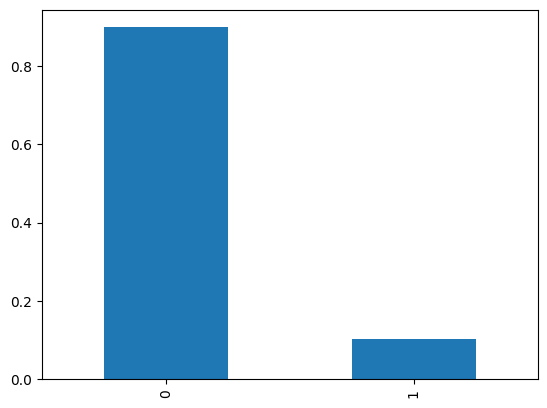

In [49]:
df.churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

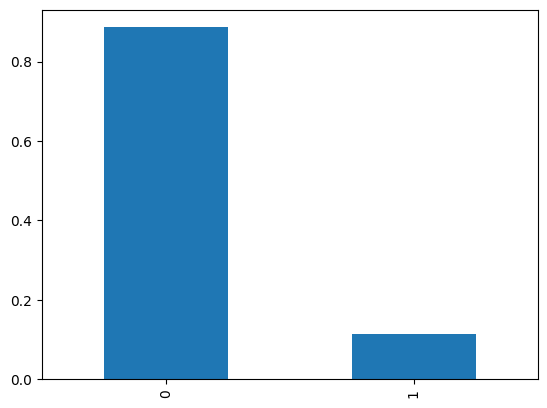

In [50]:
df[df.frq_no_data_usage=="Non_Data_Usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

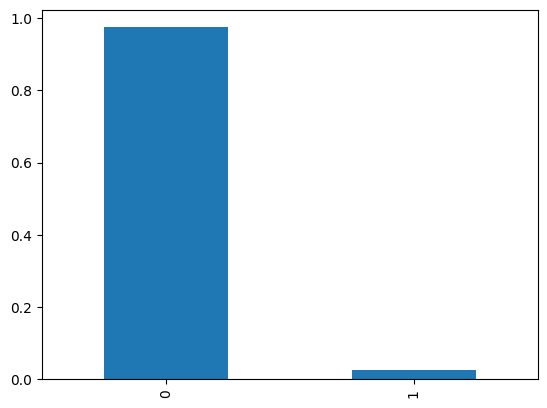

In [51]:
df[df.frq_no_data_usage=="Freq_Data_Usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

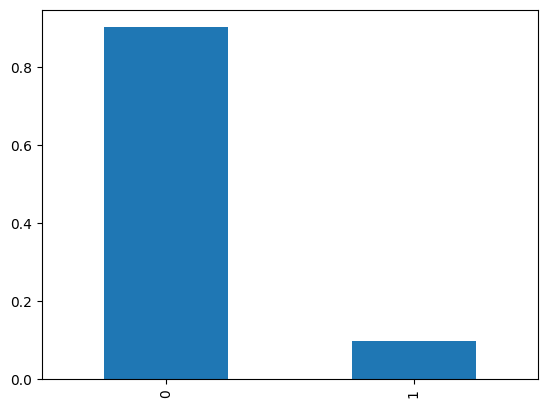

In [52]:
df[df.frq_no_data_usage=="Avg_Data_Usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

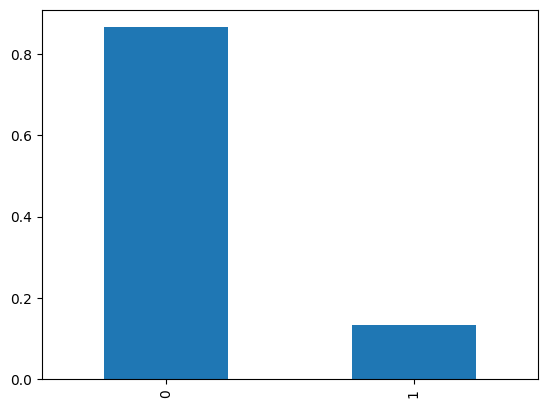

In [53]:
df[df.frq_no_data_usage=="Non_Freq_Data_Usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

    - We see as frequency of recharge of a customer decreases , churners are greater than non churners
    
        - We see if a customer is not adding any value , proption of churn to non-churn is 85:15
        - We see if a customer is rarely recharging , proption of churn to non-churn is 80:20
        - We see if a customer is recharging moderately , proption of churn to non-churn is 33:67
        - We see if a customer is recharging frequently , proption of churn to non-churn is 15:85

In [54]:
#We can say that non value customers and customers who rarely recharge are majorly churners
churn_by_month=df.groupby(["data_used_month","churn_probability"]).agg({"vol_2g_mb_6":"size"})

In [55]:
churn_by_month.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

C:\Users\PC\AppData\Local\Temp\ipykernel_3600\1260725341.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  churn_by_month.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


vol_2g_mb_6
data_used_month churn_probability             
0               0                    88.581457
                1                    11.418543
1               0                    76.201525
                1                    23.798475
12              0                    80.584642
                1                    19.415358
123             0                    97.379749
                1                     2.620251
13              0                    95.677050
                1                     4.322950
2               0                    85.857322
                1                    14.142678
23              0                    95.702811
                1                     4.297189
3               0                    95.501636
                1                     4.498364

In [56]:
churn_by_month_night_pck=df.groupby(["data_used_month","night_pck_user_6","churn_probability"]).vol_2g_mb_6.size()
churn_by_month_night_pck.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum()))

C:\Users\PC\AppData\Local\Temp\ipykernel_3600\3767123300.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  churn_by_month_night_pck.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum()))


data_used_month  night_pck_user_6  churn_probability
1                0.0               0                    76.318511
                                   1                    23.681489
                 1.0               0                    73.275862
                                   1                    26.724138
12               0.0               0                    80.663975
                                   1                    19.336025
                 1.0               0                    77.777778
                                   1                    22.222222
123              0.0               0                    97.398374
                                   1                     2.601626
                 1.0               0                    96.536797
                                   1                     3.463203
13               0.0               0                    95.711501
                                   1                     4.288499
                 1.0   

In [57]:
df["night_pck_user_6"].isna().sum()

52431

In [58]:
df[df.frq_no_data_usage=="Non_Data_Usr"]["night_pck_user_6"].isna().sum()/df.shape[0]

0.6268089544136345

In [59]:
df[df.frq_no_data_usage=="Non_Freq_Data_Usr"]["night_pck_user_6"].isna().sum()/df.shape[0]

0.08664409491564165

In [60]:
df[(df.frq_no_data_usage=="Non_Freq_Data_Usr")&((df.data_used_month=='1') | (df.data_used_month=='2')|(df.data_used_month=='3') |(df.data_used_month=='13') | (df.data_used_month=='12'))]["night_pck_user_6"].isna().sum()/df.shape[0]

0.08664409491564165

In [61]:
df.loc[df[(df.night_pck_user_6.isna())&(df.frq_no_data_usage=="Non_Data_Usr")&((df.data_used_month=='1') | (df.data_used_month=='2')|(df.data_used_month=='3') |(df.data_used_month=='13') | (df.data_used_month=='12'))].index,"night_pck_user_6"]=0

In [62]:
df_dummy=df.copy()

In [63]:
df_dummy.groupby("night_pck_user_6").arpu_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,17124.0,402.493398,372.607596,-83.735,173.46525,302.4045,516.29975,15487.684
1.0,444.0,449.232791,454.212106,1.928,171.49075,336.1955,551.98700,4501.263


In [64]:
df_dummy.groupby(["night_pck_user_6","churn_probability"]).arpu_6.describe()

count        mean         std     min  \
night_pck_user_6 churn_probability                                            
0.0              0                  15668.0  401.058570  368.540450 -83.735   
                 1                   1456.0  417.933557  413.677162  -5.000   
1.0              0                    389.0  443.286141  436.090876   1.928   
                 1                     55.0  491.291818  569.204768  63.518   

                                          25%       50%        75%        max  
night_pck_user_6 churn_probability                                             
0.0              0                  173.49375  303.4480  515.59500  15487.684  
                 1                  172.93325  293.4285  528.77525   4497.680  
1.0              0                  170.23700  336.7260  551.74300   4501.263  
                 1                  177.57950  333.9810  589.60900   2971.288

In [65]:
df_dummy.groupby(["night_pck_user_6","data_used_month","churn_probability"]).arpu_6.describe()

count        mean  \
night_pck_user_6 data_used_month churn_probability                        
0.0              1               0                   2214.0  342.202928   
                                 1                    687.0  424.198770   
                 12              0                   1798.0  397.543903   
                                 1                    431.0  398.211415   
                 123             0                  10183.0  411.276820   
                                 1                    272.0  419.820699   
                 13              0                   1473.0  423.172167   
                                 1                     66.0  473.732636   
1.0              1               0                     85.0  338.347859   
                                 1                     31.0  509.639000   
                 12              0                     49.0  366.210898   
                                 1                     14.0  309.706429   
                 123             0                    223.0  501.232117   
                                 1                      8.0  823.945500   
                 13              0                     32.0  436.238906   
                                 1                      2.0  147.393500   

                                                           std      min  \
night_pck_user_6 data_used_month churn_probability                        
0.0              1               0                  302.612662  -83.735   
                                 1                  427.603644    0.320   
                 12              0                  327.537680    0.000   
                                 1                  360.490636    0.000   
                 123             0                  357.819896   -6.149   
                                 1                  407.249019   -5.000   
                 13              0                  533.750857  -34.820   
                                 1                  586.172815    0.000   
1.0              1               0                  259.163834   41.934   
                                 1                  562.642212   74.049   
                 12              0                  408.978599   24.599   
                                 1                  201.514467   63.518   
                 123             0                  419.431615    1.928   
                                 1                  916.107380  174.924   
                 13              0                  784.631796    2.024   
                                 1                   46.444895  114.552   

                                                          25%       50%  \
night_pck_user_6 data_used_month churn_probability                        
0.0              1               0                  145.94100  253.2770   
                                 1                  185.31950  289.6560   
                 12              0                  174.72025  298.4055   
                                 1                  161.93150  299.4350   
                 123             0                  180.98500  313.3200   
                                 1                  163.48675  289.8320   
                 13              0                  172.26800  315.0350   
                                 1                  189.19475  338.3285   
1.0              1               0                  150.18600  277.5260   
                                 1                  188.42650  341.7100   
                 12              0                  127.68700  243.1480   
                                 1                  122.00225  310.1070   
                 123             0                  220.53350  379.5210   
                                 1                  301.46675  508.4250   
                 13              0                  146.37000  222.9800   
                                 1                  130.97275  147.3935   

 

- Majority Churners are those who have not availed night pack users
- Those who churned and have not used night pack in June have higher average return per unit in June on an average but their contribution is less than those who did not churn
- There are less churners who used night pack in June, average revenue per unit of them is more on an average but their contribution is less than those who did not churn marginally

In [66]:
df_dummy.groupby("night_pck_user_6").total_rech_data_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,17124.0,2.407381,2.696942,1.0,1.0,1.0,3.0,61.0
1.0,444.0,4.790541,4.796895,1.0,2.0,3.0,6.0,29.0


In [67]:
df_dummy.groupby("night_pck_user_6").total_rech_num_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,17124.0,9.400140,7.046422,1.0,5.0,8.0,12.0,116.0
1.0,444.0,15.655405,10.158371,2.0,8.0,13.0,20.0,70.0


In [68]:
df_dummy.groupby("night_pck_user_6").onnet_mou_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,16694.0,128.341173,310.444376,0.0,3.6900,27.010,109.6200,6109.08
1.0,442.0,197.344706,561.938072,0.0,5.5825,35.425,143.5625,6601.76


In [69]:
df_dummy.groupby("night_pck_user_6").max_rech_data_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,17124.0,127.938040,109.190274,5.0,25.0,149.0,177.0,1555.0
1.0,444.0,71.038288,100.960739,1.0,8.0,29.0,98.0,951.0


In [70]:
df_dummy.groupby("night_pck_user_6").av_rech_amt_data_6.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_6,,,,,,,,
0.0,17124.0,193.541946,189.260834,5.0,91.0,154.0,252.00,5920.0
1.0,444.0,165.415338,235.900996,1.0,16.0,73.5,214.25,2000.0


In [71]:
df_dummy["night_pck_user_7"].fillna(-1,inplace=True)

In [72]:
df_dummy.groupby("night_pck_user_7").total_rech_data_7.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_7,,,,,,,,
-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,17435.0,2.623057,2.986036,1.0,1.0,1.0,3.0,54.0
1.0,430.0,4.988372,5.052393,1.0,2.0,3.0,7.0,40.0


In [73]:
df_dummy.groupby("night_pck_user_7").total_rech_num_7.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_7,,,,,,,,
-1.0,52134.0,7.023651,6.746711,0.0,3.0,5.0,9.00,120.0
0.0,17435.0,9.534442,7.336994,1.0,5.0,8.0,12.00,138.0
1.0,430.0,16.406977,11.122520,1.0,9.0,14.0,20.75,80.0


In [74]:
df_dummy.groupby("night_pck_user_7").onnet_mou_7.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_7,,,,,,,,
-1.0,49873.0,134.484355,301.623318,0.0,7.99,34.260,117.9400,7399.71
0.0,17012.0,129.660050,321.338820,0.0,3.18,26.035,108.9675,7741.53
1.0,427.0,233.694239,724.655443,0.0,6.66,30.710,132.4800,8157.78


In [75]:
df_dummy.groupby("night_pck_user_7").max_rech_data_7.describe()

,count,mean,std,min,25%,50%,75%,max
night_pck_user_7,,,,,,,,
-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,17435.0,127.747634,108.865209,5.0,25.0,149.0,179.0,1555.0
1.0,430.0,71.844186,119.259805,1.0,8.0,25.0,98.0,1255.0


- We see that night packs are only data packs , it does not affect call time

- When night pack user value is 1 or 0 there is data recharge is done along with call time recharge, but for NA there is no data recharge or usage , only call time 

- Hence we can create another category using these NA

In [76]:
df["night_pck_user_6"].fillna(-1,inplace=True)
df["night_pck_user_7"].fillna(-1,inplace=True)
df["night_pck_user_8"].fillna(-1,inplace=True)

In [77]:
df["frq_nght_rechrg"]=df.apply(lambda x: non_nght_frq_user(x["night_pck_user_6"],x["night_pck_user_7"],x["night_pck_user_8"]),axis=1)

In [78]:
df["frq_nght_rechrg"].value_counts(normalize=True)

-3.0    0.626809
 0.0    0.149431
-2.0    0.126030
-1.0    0.091230
 1.0    0.003614
 3.0    0.001643
 2.0    0.001243
Name: frq_nght_rechrg, dtype: float64

In [79]:
df["frq_nght_rechrg"]=df["frq_nght_rechrg"].map(lambda x: "freq_usr" if x>=2 else  "non_freq_usr" if x>0 else "Non Users")

In [80]:
df["frq_nght_rechrg"].value_counts(normalize=True,dropna=False)

Non Users       0.993500
non_freq_usr    0.003614
freq_usr        0.002886
Name: frq_nght_rechrg, dtype: float64

<Axes: >

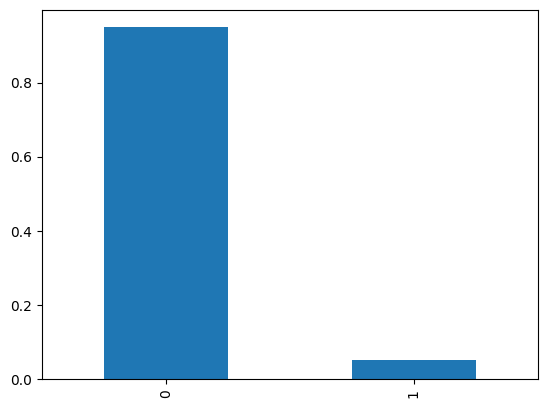

In [81]:
df[df.frq_nght_rechrg=="non_freq_usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

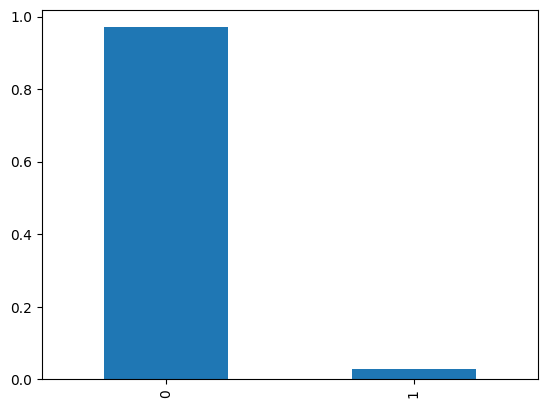

In [82]:
df[df.frq_nght_rechrg=="freq_usr"].churn_probability.value_counts(normalize=True).plot(kind='bar')

<Axes: >

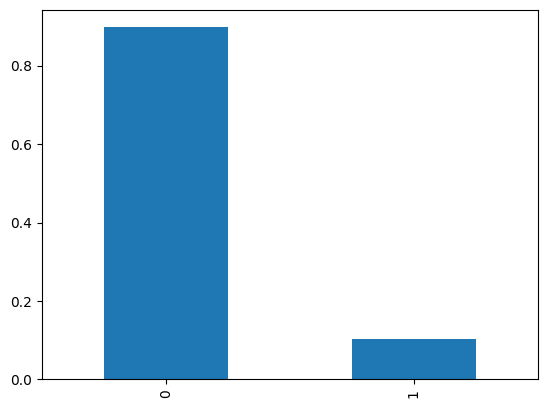

In [83]:
df[df.frq_nght_rechrg=="Non Users"].churn_probability.value_counts(normalize=True).plot(kind='bar')

- We see night pack usage does affect customer to churn

<Axes: >

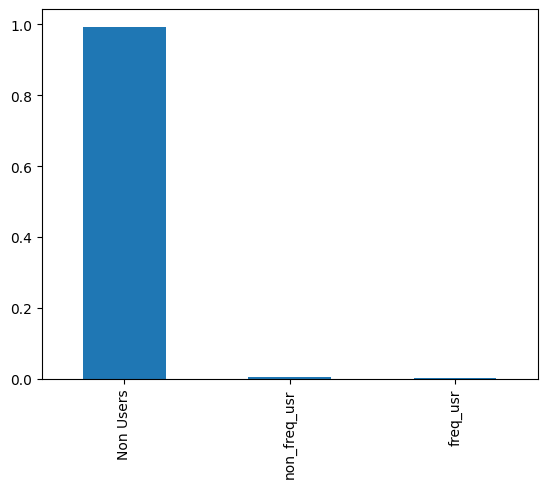

In [84]:
df.frq_nght_rechrg.value_counts(normalize=True).plot(kind='bar')

<Axes: >

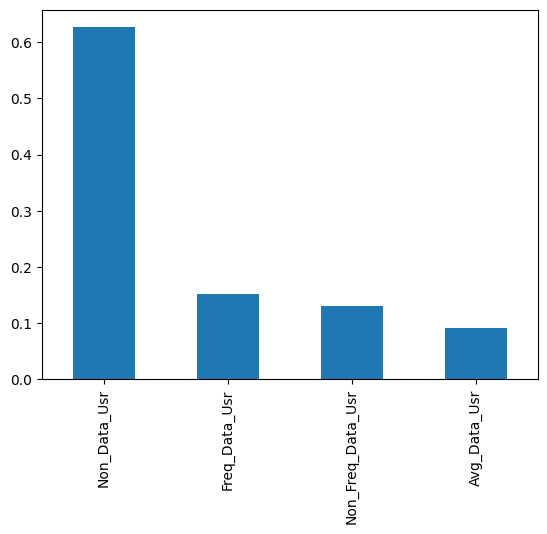

In [85]:
df.frq_no_data_usage.value_counts(normalize=True).plot(kind='bar')

In [86]:
#Since we can see in non data users customer segment they do not use night packages
# We can see that out of those customers who do frequent use data, those who are non frequent night package user churns less
#Those who frequently use data are the frequently night package user
churn_by_data_night_rech=df.groupby(["frq_no_data_usage",'frq_nght_rechrg',"churn_probability"]).vol_2g_mb_6.size()
churn_by_data_night_rech.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum()))

C:\Users\PC\AppData\Local\Temp\ipykernel_3600\2558612674.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  churn_by_data_night_rech.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum()))


frq_no_data_usage  frq_nght_rechrg  churn_probability
Avg_Data_Usr       Non Users        0                    90.244292
                                    1                     9.755708
                   non_freq_usr     0                    90.217391
                                    1                     9.782609
Freq_Data_Usr      Non Users        0                    97.384481
                                    1                     2.615519
                   freq_usr         0                    97.029703
                                    1                     2.970297
                   non_freq_usr     0                    97.515528
                                    1                     2.484472
Non_Data_Usr       Non Users        0                    88.581457
                                    1                    11.418543
Non_Freq_Data_Usr  Non Users        0                    86.544814
                                    1                    13.455186
Name: vo

In [87]:
# For average data users those who recharged in first two month and are non frequent users of night packs are likely to churn more as compared to rest
# Frequent data users are lesser likely to churn irrespective of night pack usage
# Non data users do not use night packs also , there we again see hiigh spike of churn
# Non frequent data users also do not use night packs , those who only recharged in the first month or only in the second month are more likely to churn 
churn_by_data_night_month=df.groupby(["frq_no_data_usage","data_used_month",'frq_nght_rechrg',"churn_probability"]).vol_2g_mb_6.size()
churn_by_data_night_month.groupby(level=[0,1,2]).apply(lambda x:100 * x / float(x.sum()))

C:\Users\PC\AppData\Local\Temp\ipykernel_3600\310454285.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  churn_by_data_night_month.groupby(level=[0,1,2]).apply(lambda x:100 * x / float(x.sum()))


frq_no_data_usage  data_used_month  frq_nght_rechrg  churn_probability
Avg_Data_Usr       12               Non Users        0                     80.593708
                                                     1                     19.406292
                                    non_freq_usr     0                     80.000000
                                                     1                     20.000000
                   13               Non Users        0                     95.629820
                                                     1                      4.370180
                                    non_freq_usr     0                    100.000000
                   23               Non Users        0                     95.714286
                                                     1                      4.285714
                                    non_freq_usr     0                     95.000000
                                                     1                      5.0

In [88]:
def total_arpu(month1,month2,month3):
    return month1+month2+month3
df["total_arpu"]=df.apply(lambda x:total_arpu(x["arpu_6"],x["arpu_7"],x["arpu_8"]),axis=1)

In [89]:
def trend_arpu(month1,month2,month3):
    if (not (pd.isna(month1))) & (not(pd.isna(month2))) & (not(pd.isna(month3))):
        trend_21=month2-month1
        trend_32=month3-month2
        final_trend=trend_32-trend_21
        return final_trend
    else:
        trend_21=month2-month1
        trend_32=month3-month2
        final_trend=trend_32-trend_21
        return np.abs(final_trend)
df["_trend_arpu"]=df.apply(lambda x:trend_arpu(x["arpu_6"],x["arpu_7"],x["arpu_8"]),axis=1)

In [90]:
# We see non data users have majority of churners
# We see total average revenue per unit of non churners are more than churnersm, leaving for non frequent data users who only recharged in the August, there churners have more average revenue per unit than non churner 
arpu_June_by_data_night_month=df.groupby(["frq_no_data_usage","data_used_month","churn_probability"]).total_arpu.describe()

arpu_June_by_data_night_month

count         mean  \
frq_no_data_usage data_used_month churn_probability                         
Avg_Data_Usr      12              0                   1847.0  1031.887115   
                                  1                    445.0   832.812791   
                  13              0                   1505.0  1121.454816   
                                  1                     68.0   916.232529   
                  23              0                   2383.0  1066.445874   
                                  1                    107.0   985.269477   
Freq_Data_Usr     123             0                  10406.0  1252.494617   
                                  1                    280.0  1185.631093   
Non_Data_Usr      0               0                  38866.0   719.806336   
                                  1                   5010.0   570.021917   
Non_Freq_Data_Usr 1               0                   2299.0   813.575851   
                                  1                    718.0   635.999348   
                  2               0                   2058.0   881.437649   
                                  1                    339.0   665.824139   
                  3               0                   3503.0   972.578128   
                                  1                    165.0  1014.490648   

                                                             std      min  \
frq_no_data_usage data_used_month churn_probability                         
Avg_Data_Usr      12              0                   851.720344  120.241   
                                  1                   789.674500   85.570   
                  13              0                  1508.884619  120.466   
                                  1                   959.920622  124.731   
                  23              0                   879.867677  121.537   
                                  1                   847.396113  124.219   
Freq_Data_Usr     123             0                  1019.929361  120.000   
                                  1                  1098.718788  127.180   
Non_Data_Usr      0               0                   891.873012  120.020   
                                  1                   672.428893   40.280   
Non_Freq_Data_Usr 1               0                   777.540353  120.106   
                                  1                   745.004088   44.854   
                  2               0                   805.338573  120.040   
                                  1                   655.716031  121.100   
                  3               0                   873.945221  120.273   
                                  1                  1041.464882  122.773   

                                                           25%       50%  \
frq_no_data_usage data_used_month churn_probability                        
Avg_Data_Usr      12              0                  446.55050  782.1090   
                                  1                  328.09600  559.7760   
                  13              0                  446.13300  835.9110   
                                  1                  333.96550  589.9005   
                  23              0                  464.41100  839.7370   
                                  1                  428.69100  742.4870   
Freq_Data_Usr     123             0                  594.83650  968.4600   
                                  1                  485.74200  855.2195   
Non_Data_Usr      0               0                  283.97575  517.5070   
                                  1                  198.23100  369.6160   
Non_Freq_Data_Usr 1               0                  313.47200  587.4200   
                                  1                  219.14750  411.8145   
                  2               0                  347.56150  639.4215   
                                  1                  245.39000  463.9300   
                  3               0                  365.23950  7

In [91]:
# Those having average trend of arpu as negative it means average revenue per unit was more in june and july than in July and August
# We only see significant difference in trend of average revenue per unit for customers who were average in data usage and only recharged in June and August or in July and August
# Those who frequently recharged , those who churned have higher revenue in june and july , we see fall or no use in August . Hence there is significant difference in churner to non churner revenue trend
# Customers who are non frequent data users , we notice there is significant difference in revenue trend of churner to non churner
trend_arpu_June_by_data_night_month=df.groupby(["frq_no_data_usage","data_used_month","churn_probability"])._trend_arpu.describe()

trend_arpu_June_by_data_night_month

count        mean  \
frq_no_data_usage data_used_month churn_probability                        
Avg_Data_Usr      12              0                   1847.0 -112.145569   
                                  1                    445.0 -170.923333   
                  13              0                   1505.0  263.941789   
                                  1                     68.0  302.770074   
                  23              0                   2383.0 -130.295367   
                                  1                    107.0 -290.669215   
Freq_Data_Usr     123             0                  10406.0    2.493622   
                                  1                    280.0 -143.628386   
Non_Data_Usr      0               0                  38866.0    9.499125   
                                  1                   5010.0    7.502667   
Non_Freq_Data_Usr 1               0                   2299.0  100.822901   
                                  1                    718.0  150.528121   
                  2               0                   2058.0 -193.537201   
                                  1                    339.0 -413.387145   
                  3               0                   3503.0  113.287888   
                                  1                    165.0   58.568739   

                                                            std        min  \
frq_no_data_usage data_used_month churn_probability                          
Avg_Data_Usr      12              0                  392.219747  -3704.813   
                                  1                  432.837256  -2386.044   
                  13              0                  461.473095  -5287.557   
                                  1                  586.050220   -985.760   
                  23              0                  389.017874  -4232.615   
                                  1                  690.194976  -6324.593   
Freq_Data_Usr     123             0                  392.008622  -7683.600   
                                  1                  528.165299  -2991.432   
Non_Data_Usr      0               0                  317.206684 -10932.456   
                                  1                  472.931272  -4220.342   
Non_Freq_Data_Usr 1               0                  334.134236  -4148.392   
                                  1                  646.812405 -10889.744   
                  2               0                  391.976822  -4124.912   
                                  1                  625.566152  -6078.782   
                  3               0                  352.709204  -2958.933   
                                  1                  678.584148  -2712.739   

                                                           25%       50%  \
frq_no_data_usage data_used_month churn_probability                        
Avg_Data_Usr      12              0                 -248.69000  -79.5430   
                                  1                 -325.42400  -94.0240   
                  13              0                   73.05800  255.1230   
                                  1                   45.49500  241.1870   
                  23              0                 -272.00700 -101.6650   
                                  1                 -428.03100 -192.5540   
Freq_Data_Usr     123             0                 -139.71500   16.0330   
                                  1                 -299.63850  -83.1400   
Non_Data_Usr      0               0                  -91.26950   14.9885   
                                  1                 -168.99975   54.0660   
Non_Freq_Data_Usr 1               0                  -30.66250  107.5350   
                                  1                   48.95925  186.8560   
                  2               0                 -351.43975 -155.3870   
                                  1                 -558.66700 -303.4270   
                  3               0                  -34.21100  1

In [92]:
def total_mou(month1,month2,month3):
    return month1+month2+month3
df["onnet_total_mou"]=df.apply(lambda x:total_mou(x["onnet_mou_6"],x["onnet_mou_7"],x["onnet_mou_8"]),axis=1)

In [93]:
# We see total minute of usage on network for churners are more than non churners of customers who are either Recharged radically and only in first two month or are frequent recharger
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).onnet_total_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  161.670812   
                                    1                    106.0  344.418302   
                13                  0                    355.0  261.017014   
                                    1                     34.0  138.439706   
                23                  0                    436.0  186.030757   
                                    1                     33.0  167.531818   
Freq_Rech       123                 0                  58281.0  402.920013   
                                    1                   3614.0  485.120136   
Non_Freq_Rech   1                   0                     46.0  217.769565   
                                    1                      6.0  125.666667   
                2                   0                     24.0  716.684167   
                                    1                      2.0  429.790000   
                3                   0                     16.0  266.970000   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   47.200000   
                                    1                      0.0         NaN   

                                                               std     min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   344.287322    0.00   
                                    1                   661.684101    0.00   
                13                  0                   574.472507    0.00   
                                    1                   171.159813    0.00   
                23                  0                   354.121671    0.00   
                                    1                   201.190987    0.00   
Freq_Rech       123                 0                   836.210680    0.00   
                                    1                   975.615913    0.00   
Non_Freq_Rech   1                   0                   364.870344    0.00   
                                    1                   243.014861    0.00   
                2                   0                  1130.706570    1.11   
                                    1                    15.443212  418.87   
                3                   0                   296.615668    7.65   
                                    1                          NaN     NaN   
Non_Rech        0                   0                    29.302505   26.48   
                                    1                          NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                   23.4200   69.020   
                                    1                   27.5000   83.390   
                13                  0                   25.2300   83.960   
                                    1                    9.7500   50.850   
                23                  0                   19.2400   65.410   
                                    1                   21.8100   87.290   
Freq_Rech       123                 0                   36.1000  121.250   
                                    1                   38.2300  143.825   
Non_Freq_Rech   1                   0                   27.4625   73.650   
                                    1                    5.1875   21.220   
                2                   0                   39.3350  196.530   
                                    1                  424.3300  429.790   
                3                   0                   49.4525  165.445   
                                    1                       NaN      NaN   
Non_Rech        0              

In [94]:
def trend_mou(month1,month2,month3):
    if (not (pd.isna(month1))) & (not(pd.isna(month2))) & (not(pd.isna(month3))):
        trend_21=month2-month1
        trend_32=month3-month2
        final_trend=trend_32-trend_21
        return final_trend
    else:
        trend_21=month2-month1
        trend_32=month3-month2
        final_trend=trend_32-trend_21
        return np.abs(final_trend)
df["onnet_trend_mou"]=df.apply(lambda x:trend_mou(x["onnet_mou_6"],x["onnet_mou_7"],x["onnet_mou_8"]),axis=1)

In [95]:
# Negative values of on-network minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see significant difference in trend of on network minutes of usage between churners and non churners , we see that those who churn have high minutes of usage in June and July than July and August
# We see generally on network minutes of usage of non churners are more than churners
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).onnet_trend_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   -8.737678   
                                    1                    106.0 -165.055000   
                13                  0                    355.0  112.627887   
                                    1                     34.0  110.193824   
                23                  0                    436.0    0.371422   
                                    1                     33.0 -110.040000   
Freq_Rech       123                 0                  58281.0   -4.740575   
                                    1                   3614.0  -65.042452   
Non_Freq_Rech   1                   0                     46.0   47.424348   
                                    1                      6.0   12.051667   
                2                   0                     24.0   14.610417   
                                    1                      2.0 -505.535000   
                3                   0                     16.0   65.283750   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0  -63.710000   
                                    1                      0.0         NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  259.797839 -4873.50   
                                    1                  841.928176 -7385.79   
                13                  0                  287.634835  -788.18   
                                    1                  168.273561   -91.61   
                23                  0                  266.766794 -1772.53   
                                    1                  259.762708  -907.02   
Freq_Rech       123                 0                  307.372354 -8532.38   
                                    1                  464.388191 -5747.06   
Non_Freq_Rech   1                   0                  112.868646  -141.87   
                                    1                   22.578769    -5.04   
                2                   0                  238.403000  -773.86   
                                    1                  382.155860  -775.76   
                3                   0                  102.811111   -65.26   
                                    1                         NaN      NaN   
Non_Rech        0                   0                   54.871486  -102.51   
                                    1                         NaN      NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  -15.4150    3.680   
                                    1                  -59.9175   -1.975   
                13                  0                    0.5600   21.260   
                                    1                    0.1350   42.315   
                23                  0                  -24.1200    0.670   
                                    1                 -106.9700   -4.890   
Freq_Rech       123                 0                  -28.1700    2.180   
                                    1                  -90.3250   -0.320   
Non_Freq_Rech   1                   0                   -1.6125   19.515   
                                    1                   -1.7550    5.635   
                2                   0                  -24.7025   28.140   
                                    1                 -640.6475 -505.535   
                3                   0                   -0.7775   42.420   
                                    1                       NaN      NaN   
Non_Rech        0              

- Over the months of June and July churners on network minutes of usage is more than non churners for most of the clusters, only for users who are non data users and recharge rarely and also Non Frequent Data user and Recharge rarely have on network minutes of usage of churners less than non churners.

- But in the last month of August , on network minutes of usage of non churners are more than those who have churned, leaving users who are frequent data user and frequently recharge and also those who do not use data and are non value customers.

In [96]:
df["ofnet_total_mou"]=df.apply(lambda x:total_mou(x["offnet_mou_6"],x["offnet_mou_7"],x["offnet_mou_8"]),axis=1)
df["ofnet_trend_mou"]=df.apply(lambda x:trend_mou(x["offnet_mou_6"],x["offnet_mou_7"],x["offnet_mou_8"]),axis=1)

In [97]:
# Generally on an average off network minute of usage of churners are less than non churners , but those who are recharge radically who recharged only in June and July have opposite , also lies the same for non frequent rechragers who recharged only in June  
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).ofnet_total_mou.describe()

count         mean  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                    887.0   334.699391   
                                    1                    106.0   355.200283   
                13                  0                    355.0   445.770479   
                                    1                     34.0   385.653235   
                23                  0                    436.0   337.187500   
                                    1                     33.0   223.905455   
Freq_Rech       123                 0                  58281.0   605.439765   
                                    1                   3614.0   577.708058   
Non_Freq_Rech   1                   0                     46.0   502.351957   
                                    1                      6.0   581.071667   
                2                   0                     24.0  1176.947917   
                                    1                      2.0   589.910000   
                3                   0                     16.0   769.885625   
                                    1                      0.0          NaN   
Non_Rech        0                   0                      2.0   216.010000   
                                    1                      0.0          NaN   

                                                               std     min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   403.722939    0.00   
                                    1                   373.651054   12.19   
                13                  0                  1244.439135    0.00   
                                    1                   517.404517    7.00   
                23                  0                   675.284139    0.00   
                                    1                   280.618697   11.07   
Freq_Rech       123                 0                   867.631378    0.00   
                                    1                   908.899420    0.00   
Non_Freq_Rech   1                   0                   801.817905    0.00   
                                    1                  1062.550787    0.00   
                2                   0                  1646.365079    0.00   
                                    1                   671.581736  115.03   
                3                   0                  1046.000953    8.83   
                                    1                          NaN     NaN   
Non_Rech        0                   0                    66.369042  169.08   
                                    1                          NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  122.1000  230.360   
                                    1                  125.1925  252.360   
                13                  0                   81.3150  190.500   
                                    1                   55.6675  129.795   
                23                  0                   82.8100  160.810   
                                    1                   54.5800  143.250   
Freq_Rech       123                 0                  138.6100  319.510   
                                    1                  109.4800  261.160   
Non_Freq_Rech   1                   0                   86.4150  205.405   
                                    1                  120.0025  170.915   
                2                   0                  104.1900  366.850   
                                    1                  352.4700  589.910   
                3                   0                  160.7250  333.170   
                                    1                       NaN      NaN   
Non_Rech     

In [98]:
# Negative values of off-network minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see significant difference in trend of off network minutes of usage between churners and non churners , we see that those who churn have high minutes of usage in June and July than July and August, except for customers who used data very radically and only recharged in month of June and August
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).ofnet_trend_mou.describe()

count         mean  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                    887.0    -9.688095   
                                    1                    106.0   -84.705283   
                13                  0                    355.0   141.295155   
                                    1                     34.0   296.984706   
                23                  0                    436.0   -33.253050   
                                    1                     33.0  -133.264545   
Freq_Rech       123                 0                  58281.0    -3.543118   
                                    1                   3614.0   -84.553937   
Non_Freq_Rech   1                   0                     46.0    27.982826   
                                    1                      6.0  -114.878333   
                2                   0                     24.0    51.117917   
                                    1                      2.0 -1074.445000   
                3                   0                     16.0    25.325000   
                                    1                      0.0          NaN   
Non_Rech        0                   0                      2.0  -123.275000   
                                    1                      0.0          NaN   

                                                               std       min  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                   358.172025  -5887.46   
                                    1                   324.085880  -1761.17   
                13                  0                   364.978622   -611.96   
                                    1                   535.048220   -851.33   
                23                  0                   361.757565  -3335.60   
                                    1                   346.094133  -1399.42   
Freq_Rech       123                 0                   327.219757 -10439.21   
                                    1                   494.871211  -6717.04   
Non_Freq_Rech   1                   0                   254.283318  -1090.40   
                                    1                   400.435416   -923.85   
                2                   0                   268.020267   -454.79   
                                    1                  1280.351178  -1979.79   
                3                   0                   101.368850   -169.21   
                                    1                          NaN       NaN   
Non_Rech        0                   0                   167.336820   -241.60   
                                    1                          NaN       NaN   

                                                             25%       50%  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   -56.0900    16.000   
                                    1                  -127.6075     1.645   
                13                  0                     3.9350    66.950   
                                    1                    25.7975    97.090   
                23                  0                   -51.8125     0.000   
                                    1                  -109.0500   -13.730   
Freq_Rech       123                 0                   -60.2100     7.330   
                                    1                  -138.5775    -6.510   
Non_Freq_Rech   1                   0                   -52.5275    29.780   
                                    1                     0.2275     3.905   
                2                   0                   -87.2975     0.000   
                                    1                 -1527.1175 -1074.445   
                3                   0                   -43.4100    12.645   
                       

- Over the period of months from june to august we see that off network minutes usage decreases of users who churned and increases for those who have not churned

In [99]:
df["roaming_total_incoming_mou"]=df.apply(lambda x:total_mou(x["roam_ic_mou_6"],x["roam_ic_mou_7"],x["roam_ic_mou_8"]),axis=1)
df["roaming_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["roam_ic_mou_6"],x["roam_ic_mou_7"],x["roam_ic_mou_8"]),axis=1)

In [100]:
# We see those who churned have higher minutes of incoming usage on roaming as compared to non churners , except for non frequent rechargers 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).roaming_total_incoming_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  13.213585   
                                    1                    106.0  38.916604   
                13                  0                    355.0  10.502225   
                                    1                     34.0  21.483824   
                23                  0                    436.0   7.505826   
                                    1                     33.0  52.482121   
Freq_Rech       123                 0                  58281.0  20.958085   
                                    1                   3614.0  73.360277   
Non_Freq_Rech   1                   0                     46.0   5.217826   
                                    1                      6.0  10.501667   
                2                   0                     24.0   3.138333   
                                    1                      2.0   1.070000   
                3                   0                     16.0   6.005000   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.000000   
                                    1                      0.0        NaN   

                                                              std  min    25%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                   66.670099  0.0  0.000   
                                    1                  115.903739  0.0  0.000   
                13                  0                   30.697810  0.0  0.000   
                                    1                   55.098275  0.0  0.000   
                23                  0                   45.858494  0.0  0.000   
                                    1                  196.883577  0.0  0.000   
Freq_Rech       123                 0                  115.450720  0.0  0.000   
                                    1                  315.270095  0.0  0.000   
Non_Freq_Rech   1                   0                   17.440619  0.0  0.000   
                                    1                   19.818588  0.0  0.000   
                2                   0                    9.880275  0.0  0.000   
                                    1                    1.513209  0.0  0.535   
                3                   0                   24.020000  0.0  0.000   
                                    1                         NaN  NaN    NaN   
Non_Rech        0                   0                    0.000000  0.0  0.000   
                                    1                         NaN  NaN    NaN   

                                                         50%      75%      max  
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.000   0.0000  1336.42  
                                    1                  0.000  25.3300   774.25  
                13                  0                  0.000   2.0900   234.84  
                                    1                  2.260  18.3650   306.03  
                23                  0                  0.000   1.9050   898.62  
                                    1                  2.960  17.1600  1123.80  
Freq_Rech       123                 0                  0.000   2.0100  9716.20  
                                    1                  6.425  35.3500  9019.54  
Non_Freq_Rech   1                   0                  0.000   0.0000    80.76  
                                    1                  0.000  10.2075    49.40  
                2                   0                  0.000   0.0000    39.11  
                                    1                  1.070   1.6050     2.14  
                3                   0                  0.000   0.0000    96.0

In [101]:
# Negative values of roaming incoming minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We notice that those who churned have higher minutes of usage over incoming calls on roaming in June-July than July-August
# We notice that for customers who were radical while recharging and only recharged in month of June and August there churners minutes of usage for incoming calls over roaming were more than non churners, it lies same for customers who did not recharge frequently and only recharged in June
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).roaming_trend_incoming_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   1.987328   
                                    1                    106.0  -2.595189   
                13                  0                    355.0   2.677380   
                                    1                     34.0   5.704706   
                23                  0                    436.0   1.080115   
                                    1                     33.0 -13.916970   
Freq_Rech       123                 0                  58281.0   2.995608   
                                    1                   3614.0  -4.066270   
Non_Freq_Rech   1                   0                     46.0   2.030000   
                                    1                      6.0  10.501667   
                2                   0                     24.0   3.125833   
                                    1                      2.0   1.070000   
                3                   0                     16.0   6.005000   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.000000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   86.079484 -2292.17   
                                    1                  104.719332 -1019.63   
                13                  0                   30.648677  -301.88   
                                    1                   17.924020   -21.58   
                23                  0                   16.914710  -171.88   
                                    1                  146.656038  -812.13   
Freq_Rech       123                 0                   76.075186 -4368.34   
                                    1                  160.889529 -5356.39   
Non_Freq_Rech   1                   0                   16.712405   -65.88   
                                    1                   19.818588     0.00   
                2                   0                    9.844569     0.00   
                                    1                    1.513209     0.00   
                3                   0                   24.020000     0.00   
                                    1                         NaN      NaN   
Non_Rech        0                   0                    0.000000     0.00   
                                    1                         NaN      NaN   

                                                          25%   50%      75%  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                  0.0000  0.00   0.0000   
                                    1                  0.0000  0.00   3.1325   
                13                  0                  0.0000  0.00   0.0000   
                                    1                  0.0000  0.00   4.0550   
                23                  0                  0.0000  0.00   0.0000   
                                    1                  0.0000  0.00   7.7800   
Freq_Rech       123                 0                  0.0000  0.00   0.0000   
                                    1                 -0.4525  0.00   7.8300   
Non_Freq_Rech   1                   0                  0.0000  0.00   0.0000   
                                    1                  0.0000  0.00  10.2075   
                2                   0                  0.0000  0.00   0.0000   
                                    1                  0.5350  1.07   1.6050   
                3                   0                  0.0000  0.00   0.0000   
                                    1                     NaN   N

- We see over the period of months from june to august roaming incoming calls minutes of usage is more for users who churned than those who have not churned , in most of the cases

In [102]:
df["roaming_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["roam_og_mou_6"],x["roam_og_mou_7"],x["roam_og_mou_8"]),axis=1)
df["roaming_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["roam_og_mou_6"],x["roam_og_mou_7"],x["roam_og_mou_8"]),axis=1)

In [103]:
# We see those who churned have higher minutes of outgoing usage on roaming as compared to non churners , except for non frequent rechargers who recharged in July

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).roaming_total_outgoing_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   14.206550   
                                    1                    106.0   72.526792   
                13                  0                    355.0   19.664113   
                                    1                     34.0   28.923824   
                23                  0                    436.0   15.020734   
                                    1                     33.0   41.700000   
Freq_Rech       123                 0                  58281.0   29.662347   
                                    1                   3614.0  102.634701   
Non_Freq_Rech   1                   0                     46.0    5.594565   
                                    1                      6.0   13.645000   
                2                   0                     24.0    4.188750   
                                    1                      2.0    0.565000   
                3                   0                     16.0    3.290000   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0    0.000000   
                                    1                      0.0         NaN   

                                                              std  min  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   58.949321  0.0   
                                    1                  242.751405  0.0   
                13                  0                   75.792621  0.0   
                                    1                   52.893366  0.0   
                23                  0                   56.248327  0.0   
                                    1                   77.032453  0.0   
Freq_Rech       123                 0                  145.354022  0.0   
                                    1                  326.646468  0.0   
Non_Freq_Rech   1                   0                   24.661757  0.0   
                                    1                   32.271375  0.0   
                2                   0                   15.848688  0.0   
                                    1                    0.799031  0.0   
                3                   0                   13.160000  0.0   
                                    1                         NaN  NaN   
Non_Rech        0                   0                    0.000000  0.0   
                                    1                         NaN  NaN   

                                                          25%     50%  \
frq_no_recharge recharge_used_month churn_probability                   
Avg_Rech        12                  0                  0.0000   0.000   
                                    1                  0.0000   0.000   
                13                  0                  0.0000   0.000   
                                    1                  0.0000   6.410   
                23                  0                  0.0000   0.000   
                                    1                  0.0000  14.830   
Freq_Rech       123                 0                  0.0000   0.000   
                                    1                  0.0000  18.020   
Non_Freq_Rech   1                   0                  0.0000   0.000   
                                    1                  0.0000   0.000   
                2                   0                  0.0000   0.000   
                                    1                  0.2825   0.565   
                3                   0                  0.0000   0.000   
                                    1                     NaN     NaN   
Non_Rech        0                   0                  0.0000   0.000   
                                    1                     NaN     NaN   

    

In [104]:
# Negative values of roaming outgoing minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We notice that those who churned have higher minutes of usage over outgoing calls on roaming in June-July than July-August , leaving customers who recharged radically in month of July and August
# We notice that those who did not churn have higher minutes of usage on outgoing calls on roaming as compared to who churned, except for customers who recharged radically in month of July and August, it lies same for non frequent rechargers 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).roaming_trend_outgoing_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   2.826437   
                                    1                    106.0  -5.667642   
                13                  0                    355.0   9.367099   
                                    1                     34.0   8.335000   
                23                  0                    436.0  -1.415826   
                                    1                     33.0  11.404545   
Freq_Rech       123                 0                  58281.0   4.216729   
                                    1                   3614.0   0.459051   
Non_Freq_Rech   1                   0                     46.0   2.314783   
                                    1                      6.0  13.645000   
                2                   0                     24.0   4.188750   
                                    1                      2.0   0.565000   
                3                   0                     16.0   3.290000   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.000000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   62.382624 -1382.74   
                                    1                   80.102407  -366.21   
                13                  0                   60.928864  -422.88   
                                    1                   40.778009   -72.42   
                23                  0                   70.927250 -1027.33   
                                    1                   31.670330  -113.14   
Freq_Rech       123                 0                   89.401050 -2294.78   
                                    1                  160.143148 -2421.27   
Non_Freq_Rech   1                   0                    7.301032    -2.40   
                                    1                   32.271375     0.00   
                2                   0                   15.848688     0.00   
                                    1                    0.799031     0.00   
                3                   0                   13.160000     0.00   
                                    1                         NaN      NaN   
Non_Rech        0                   0                    0.000000     0.00   
                                    1                         NaN      NaN   

                                                          25%    50%      75%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   0.0000   
                13                  0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   5.4150   
                23                  0                  0.0000  0.000   0.0000   
                                    1                  0.0000  9.800  21.1600   
Freq_Rech       123                 0                  0.0000  0.000   0.0000   
                                    1                 -2.0200  0.000  20.6900   
Non_Freq_Rech   1                   0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   1.7850   
                2                   0                  0.0000  0.000   0.0000   
                                    1                  0.2825  0.565   0.8475   
                3                   0                  0.0000  0.000   0.0000   
                                    1             

- We see over the period of months from june to august roaming outgoing calls minutes of usage is more for users who churned than those who have not churned , in most of the cases



In [105]:
df["local_total_outgoing_t2t_mou"]=df.apply(lambda x:total_mou(x["loc_og_t2t_mou_6"],x["loc_og_t2t_mou_7"],x["loc_og_t2t_mou_8"]),axis=1)
df["local_trend_outgoing_t2t_mou"]=df.apply(lambda x:trend_mou(x["loc_og_t2t_mou_6"],x["loc_og_t2t_mou_7"],x["loc_og_t2t_mou_8"]),axis=1)

In [106]:
# We see those who churned have lower minutes of outgoing usage on local network telephone to telephone as compared to non churners 
# There is clear distinction between Churner and Non Churner

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_outgoing_t2t_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  111.492266   
                                    1                    106.0   74.801792   
                13                  0                    355.0  109.270366   
                                    1                     34.0   34.805588   
                23                  0                    436.0   59.325000   
                                    1                     33.0   27.123939   
Freq_Rech       123                 0                  58281.0  148.738937   
                                    1                   3614.0   68.441992   
Non_Freq_Rech   1                   0                     46.0  138.970000   
                                    1                      6.0   80.655000   
                2                   0                     24.0  315.174167   
                                    1                      2.0   76.180000   
                3                   0                     16.0  169.069375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   47.200000   
                                    1                      0.0         NaN   

                                                              std    min  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  303.826137   0.00   
                                    1                  180.252823   0.00   
                13                  0                  263.537696   0.00   
                                    1                   60.399130   0.00   
                23                  0                  212.130319   0.00   
                                    1                   55.417170   0.00   
Freq_Rech       123                 0                  442.967248   0.00   
                                    1                  257.737305   0.00   
Non_Freq_Rech   1                   0                  244.518309   0.00   
                                    1                  175.511919   0.00   
                2                   0                  387.607476   0.00   
                                    1                   27.322606  56.86   
                3                   0                  186.898487   5.19   
                                    1                         NaN    NaN   
Non_Rech        0                   0                   29.302505  26.48   
                                    1                         NaN    NaN   

                                                           25%      50%  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  11.0650   41.380   
                                    1                   2.2925   22.115   
                13                  0                   4.9500   26.980   
                                    1                   0.0000    3.315   
                23                  0                   4.0625   16.015   
                                    1                   0.6300    3.480   
Freq_Rech       123                 0                  13.3600   46.900   
                                    1                   2.5100   15.995   
Non_Freq_Rech   1                   0                  19.3925   57.370   
                                    1                   1.8025   10.035   
                2                   0                  39.3350  158.855   
                                    1                  66.5200   76.180   
                3                   0                  38.3050  106.730   
                                    1                      NaN      NaN   
Non_Rech        0                   0                  36.8400   47.200   
        

In [107]:
# Negative values of local outgoing minute of usage trend telphone to telephone over months means that minute of usage of June and July were greater than minutes of usage in July and August
# For Frequent rechargers their minutes of usage over local telephone to telephone , those who churned have higher usage in months of June to July as Compared to July to August than Non-Churners
# We see the same for Non frequent rechargers
# Average rechargers does not show any clear distinction
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_outgoing_t2t_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -0.243901   
                                    1                    106.0   0.899623   
                13                  0                    355.0  22.933324   
                                    1                     34.0  21.668235   
                23                  0                    436.0   4.711720   
                                    1                     33.0 -20.687879   
Freq_Rech       123                 0                  58281.0  -1.021305   
                                    1                   3614.0  -8.727936   
Non_Freq_Rech   1                   0                     46.0  28.378913   
                                    1                      6.0  -9.255000   
                2                   0                     24.0  48.007917   
                                    1                      2.0 -65.855000   
                3                   0                     16.0  57.561250   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0 -63.710000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  214.542262 -4874.04   
                                    1                  152.060636  -389.35   
                13                  0                   97.191811  -498.04   
                                    1                   56.336275   -91.61   
                23                  0                  150.574287  -911.59   
                                    1                   95.502479  -438.19   
Freq_Rech       123                 0                  152.951935 -6438.79   
                                    1                  150.882319 -2702.45   
Non_Freq_Rech   1                   0                   93.199059  -141.87   
                                    1                   24.491075   -57.91   
                2                   0                  155.858479  -294.46   
                                    1                   67.691332  -113.72   
                3                   0                   93.080480   -49.65   
                                    1                         NaN      NaN   
Non_Rech        0                   0                   54.871486  -102.51   
                                    1                         NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                 -10.5950   1.960   
                                    1                 -15.7625   0.000   
                13                  0                   0.0000   6.230   
                                    1                   0.0000   1.490   
                23                  0                  -7.0825   0.210   
                                    1                  -4.8900   0.000   
Freq_Rech       123                 0                 -12.4600   0.910   
                                    1                 -11.7275   0.000   
Non_Freq_Rech   1                   0                  -2.9300   8.830   
                                    1                  -4.2475  -1.960   
                2                   0                 -20.7175  12.550   
                                    1                 -89.7875 -65.855   
                3                   0                  -7.6850  33.720   
                                    1                      NaN     NaN   
Non_Rech        0                   0                 -83.1100 -63.710   
       

- We notice that for users who churned their minutes of usage over local outgoing call from telephone to telephone drops over period of month from june to july and also non churners minutes of usage over local outgoing telephone to telephone is more than churners

In [108]:
df["local_total_outgoing_t2m_mou"]=df.apply(lambda x:total_mou(x["loc_og_t2m_mou_6"],x["loc_og_t2m_mou_7"],x["loc_og_t2m_mou_8"]),axis=1)
df["local_trend_outgoing_t2m_mou"]=df.apply(lambda x:trend_mou(x["loc_og_t2m_mou_6"],x["loc_og_t2m_mou_7"],x["loc_og_t2m_mou_8"]),axis=1)

In [109]:
# We see those who churned have lower minutes of outgoing usage on local network telephone to mobile as compared to non churners 
# There is clear distinction between Churner and Non Churner , only for users who do not recharge frequently , those who only recharged in June , churners had more minutes of usage than non churners

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_outgoing_t2m_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  222.054690   
                                    1                    106.0  135.056132   
                13                  0                    355.0  232.200592   
                                    1                     34.0   62.393529   
                23                  0                    436.0  113.895183   
                                    1                     33.0   56.351515   
Freq_Rech       123                 0                  58281.0  294.257256   
                                    1                   3614.0  128.173049   
Non_Freq_Rech   1                   0                     46.0  313.201522   
                                    1                      6.0  362.198333   
                2                   0                     24.0  634.612083   
                                    1                      2.0  151.395000   
                3                   0                     16.0  495.972500   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0  196.615000   
                                    1                      0.0         NaN   

                                                              std     min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  291.041265    0.00   
                                    1                  206.407451    0.00   
                13                  0                  743.913666    0.00   
                                    1                   82.258208    0.00   
                23                  0                  156.063200    0.00   
                                    1                   88.569794    0.00   
Freq_Rech       123                 0                  444.746686    0.00   
                                    1                  255.533108    0.00   
Non_Freq_Rech   1                   0                  419.864384    0.00   
                                    1                  707.451271    0.00   
                2                   0                  774.984222    0.00   
                                    1                  168.340911   32.36   
                3                   0                  641.017103    0.00   
                                    1                         NaN     NaN   
Non_Rech        0                   0                   63.377981  151.80   
                                    1                         NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                   57.7700  143.930   
                                    1                   26.2425   76.555   
                13                  0                   20.4700   70.250   
                                    1                    5.1775   20.010   
                23                  0                   20.1475   59.770   
                                    1                    4.6000   21.840   
Freq_Rech       123                 0                   53.9900  147.100   
                                    1                   12.1825   49.120   
Non_Freq_Rech   1                   0                   69.9000  161.530   
                                    1                   72.4325   88.020   
                2                   0                   95.0575  336.140   
                                    1                   91.8775  151.395   
                3                   0                   84.4825  225.670   
                                    1                       NaN      NaN   
Non_Rech        0                   0            

In [110]:
# Negative values of local outgoing minute of usage trend telphone to mobile over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage over telephone to mobile have higher usage in June-July than July-August
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_outgoing_t2m_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0    5.018895   
                                    1                    106.0  -23.924623   
                13                  0                    355.0   43.425211   
                                    1                     34.0   37.450294   
                23                  0                    436.0   -5.601147   
                                    1                     33.0  -44.713939   
Freq_Rech       123                 0                  58281.0    1.003778   
                                    1                   3614.0  -19.065066   
Non_Freq_Rech   1                   0                     46.0   32.376087   
                                    1                      6.0  -51.726667   
                2                   0                     24.0   35.992083   
                                    1                      2.0 -302.790000   
                3                   0                     16.0   46.508750   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0 -100.760000   
                                    1                      0.0         NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  177.014516 -2802.76   
                                    1                   91.149862  -382.47   
                13                  0                  138.177802  -346.09   
                                    1                   68.408376  -207.93   
                23                  0                   89.046267  -494.48   
                                    1                  119.308463  -573.70   
Freq_Rech       123                 0                  152.662506 -3973.61   
                                    1                  146.003449 -3685.37   
Non_Freq_Rech   1                   0                  158.964314  -270.96   
                                    1                  152.316176  -354.25   
                2                   0                  191.323464  -281.23   
                                    1                  336.681823  -540.86   
                3                   0                  115.911872   -59.29   
                                    1                         NaN      NaN   
Non_Rech        0                   0                  164.091200  -216.79   
                                    1                         NaN      NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  -32.7450    4.960   
                                    1                  -59.0500   -0.440   
                13                  0                    0.0000   16.170   
                                    1                    2.4025   16.905   
                23                  0                  -26.3125    0.000   
                                    1                  -32.2600   -1.870   
Freq_Rech       123                 0                  -30.6800    2.550   
                                    1                  -32.7525    0.000   
Non_Freq_Rech   1                   0                  -22.4150   10.350   
                                    1                  -29.3050   -3.575   
                2                   0                  -95.7925    0.000   
                                    1                 -421.8250 -302.790   
                3                   0                  -29.6300   13.360   
                                    1                       NaN      NaN   
Non_Rech        0              

- We notice that for users who churned their minutes of usage over local outgoing call from telephone to mobile drops over period of month from june to july and also non churners minutes of usage over local outgoing telephone to mobile is more than churners

In [111]:
df["local_total_outgoing_t2f_mou"]=df.apply(lambda x:total_mou(x["loc_og_t2f_mou_6"],x["loc_og_t2f_mou_7"],x["loc_og_t2f_mou_8"]),axis=1)
df["local_trend_outgoing_t2f_mou"]=df.apply(lambda x:trend_mou(x["loc_og_t2f_mou_6"],x["loc_og_t2f_mou_7"],x["loc_og_t2f_mou_8"]),axis=1)

In [112]:
# We see those who churned have lower minutes of outgoing usage on local network telephone to fixed line as compared to non churners 
# There is clear distinction between Churner and Non Churner 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_outgoing_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  14.576065   
                                    1                    106.0   7.172453   
                13                  0                    355.0  13.139380   
                                    1                     34.0   1.413824   
                23                  0                    436.0   6.760069   
                                    1                     33.0   2.107576   
Freq_Rech       123                 0                  58281.0  11.909926   
                                    1                   3614.0   3.909134   
Non_Freq_Rech   1                   0                     46.0  28.067391   
                                    1                      6.0  12.995000   
                2                   0                     24.0  18.268750   
                                    1                      2.0   5.315000   
                3                   0                     16.0  20.338750   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   3.795000   
                                    1                      0.0        NaN   

                                                              std  min  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   30.864447  0.0   
                                    1                   18.771743  0.0   
                13                  0                   46.940739  0.0   
                                    1                    5.521073  0.0   
                23                  0                   17.997535  0.0   
                                    1                    5.705576  0.0   
Freq_Rech       123                 0                   38.049844  0.0   
                                    1                   16.617850  0.0   
Non_Freq_Rech   1                   0                  107.149419  0.0   
                                    1                   18.169763  0.0   
                2                   0                   29.757918  0.0   
                                    1                    7.516545  0.0   
                3                   0                   24.340617  0.0   
                                    1                         NaN  NaN   
Non_Rech        0                   0                    5.366940  0.0   
                                    1                         NaN  NaN   

                                                          25%    50%      75%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.0000  2.800  14.9800   
                                    1                  0.0000  0.105   4.5800   
                13                  0                  0.0000  0.550   5.9300   
                                    1                  0.0000  0.000   0.0975   
                23                  0                  0.0000  0.055   3.9925   
                                    1                  0.0000  0.000   0.5000   
Freq_Rech       123                 0                  0.0000  1.240   8.7600   
                                    1                  0.0000  0.000   1.2300   
Non_Freq_Rech   1                   0                  0.0000  4.235  20.8375   
                                    1                  1.5450  5.020  16.6625   
                2                   0                  0.7000  5.065  17.9025   
                                    1                  2.6575  5.315   7.9725   
                3                   0                  1.7575  9.115  34.7700   
                                    1                     NaN    NaN      NaN   
Non_Rech        0                   0    

In [113]:
# Negative values of local outgoing minute of usage trend telphone to fixed line over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage over telephone to fixed line have higher usage in June-July than July-August
# Users who radically recharge and who have only recharged in July and August, Non Churners have more minutes of usage in June-July than July-August as compared to those who churned
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_outgoing_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -0.011578   
                                    1                    106.0  -2.048302   
                13                  0                    355.0   1.008648   
                                    1                     34.0   0.158235   
                23                  0                    436.0  -0.531032   
                                    1                     33.0   1.017576   
Freq_Rech       123                 0                  58281.0  -0.235777   
                                    1                   3614.0  -0.528733   
Non_Freq_Rech   1                   0                     46.0  -0.111087   
                                    1                      6.0  -2.200000   
                2                   0                     24.0  -6.306250   
                                    1                      2.0 -10.630000   
                3                   0                     16.0  -8.624375   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0  -0.795000   
                                    1                      0.0        NaN   

                                                             std     min  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  18.643481 -287.36   
                                    1                  11.060419  -68.12   
                13                  0                  13.987262  -86.39   
                                    1                   2.376361  -10.96   
                23                  0                  11.451419 -119.41   
                                    1                   3.335856   -1.92   
Freq_Rech       123                 0                  14.980701 -524.67   
                                    1                   9.805387 -171.66   
Non_Freq_Rech   1                   0                  14.898123  -63.73   
                                    1                  13.789394  -18.92   
                2                   0                  21.862378  -99.51   
                                    1                  15.033090  -21.26   
                3                   0                  26.800624  -82.96   
                                    1                        NaN     NaN   
Non_Rech        0                   0                   1.124300   -1.59   
                                    1                        NaN     NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  -0.5600   0.000   
                                    1                  -0.1425   0.000   
                13                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                23                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
Freq_Rech       123                 0                  -0.3000   0.000   
                                    1                   0.0000   0.000   
Non_Freq_Rech   1                   0                  -0.7850   0.000   
                                    1                 -10.9400  -1.030   
                2                   0                  -7.9875   0.000   
                                    1                 -15.9450 -10.630   
                3                   0                  -7.4750   0.000   
                                    1                      NaN     NaN   
Non_Rech        0                   0                  -1.1925  -0.795   
                                    1      

- We notice that for users who churned their minutes of usage over local outgoing call from telephone to fixed line drops over period of month from june to july and also non churners minutes of usage over local outgoing telephone to fixed line is more than churners

In [114]:
df["local_total_outgoing_t2c_mou"]=df.apply(lambda x:total_mou(x["loc_og_t2c_mou_6"],x["loc_og_t2c_mou_7"],x["loc_og_t2c_mou_8"]),axis=1)
df["local_trend_outgoing_t2c_mou"]=df.apply(lambda x:trend_mou(x["loc_og_t2c_mou_6"],x["loc_og_t2c_mou_7"],x["loc_og_t2c_mou_8"]),axis=1)

In [115]:
# We see those who churned have higher minutes of outgoing usage on local network telephone to their own call center as compared to non churners 
# There is clear distinction between Churner and Non Churner 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_outgoing_t2c_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   1.720496   
                                    1                    106.0   4.404340   
                13                  0                    355.0   2.150000   
                                    1                     34.0   2.414706   
                23                  0                    436.0   2.617041   
                                    1                     33.0   2.698485   
Freq_Rech       123                 0                  58281.0   3.918693   
                                    1                   3614.0   4.179834   
Non_Freq_Rech   1                   0                     46.0   1.298478   
                                    1                      6.0   1.801667   
                2                   0                     24.0  10.738333   
                                    1                      2.0   1.430000   
                3                   0                     16.0   3.308125   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.000000   
                                    1                      0.0        NaN   

                                                             std  min     25%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                   6.590338  0.0  0.0000   
                                    1                  10.256847  0.0  0.0000   
                13                  0                   5.942314  0.0  0.0000   
                                    1                   6.148868  0.0  0.0000   
                23                  0                   7.811962  0.0  0.0000   
                                    1                   7.858980  0.0  0.0000   
Freq_Rech       123                 0                  15.221634  0.0  0.0000   
                                    1                  24.059566  0.0  0.0000   
Non_Freq_Rech   1                   0                   4.308731  0.0  0.0000   
                                    1                   1.753071  0.0  0.3625   
                2                   0                  33.574675  0.0  0.0000   
                                    1                   2.022325  0.0  0.7150   
                3                   0                   7.370443  0.0  0.0000   
                                    1                        NaN  NaN     NaN   
Non_Rech        0                   0                   0.000000  0.0  0.0000   
                                    1                        NaN  NaN     NaN   

                                                        50%     75%      max  
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                  0.00  0.3200   101.55  
                                    1                  0.00  5.1750    68.92  
                13                  0                  0.00  1.0100    43.04  
                                    1                  0.00  1.5325    31.05  
                23                  0                  0.00  1.0150    66.35  
                                    1                  0.00  0.7100    42.96  
Freq_Rech       123                 0                  0.00  2.5400   877.34  
                                    1                  0.00  2.6600  1034.21  
Non_Freq_Rech   1                   0                  0.00  0.0000    22.94  
                                    1                  1.48  3.2350     4.04  
                2                   0                  0.00  0.0000   134.58  
                                    1                  1.43  2.1450     2.86  
                3                   0                  0.00  0.9750    25.00  
                          

In [116]:
# Negative values of local outgoing minute of usage trend telphone to their own call center over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage over telephone to their own call center have higher usage 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_outgoing_t2c_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0 -0.688264   
                                    1                    106.0 -1.206509   
                13                  0                    355.0  1.076761   
                                    1                     34.0  2.097941   
                23                  0                    436.0 -0.876995   
                                    1                     33.0 -2.383333   
Freq_Rech       123                 0                  58281.0 -0.110350   
                                    1                   3614.0 -1.445307   
Non_Freq_Rech   1                   0                     46.0  0.478043   
                                    1                      6.0  1.526667   
                2                   0                     24.0 -4.667917   
                                    1                      2.0 -2.065000   
                3                   0                     16.0 -1.295000   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                             std      min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                   7.396503  -127.28   
                                    1                  12.155795   -55.50   
                13                  0                   5.643108   -26.44   
                                    1                   5.364195    -1.46   
                23                  0                   9.866105  -106.76   
                                    1                  12.234236   -66.12   
Freq_Rech       123                 0                  11.801655  -831.79   
                                    1                  32.103186 -1714.51   
Non_Freq_Rech   1                   0                   2.854735    -8.21   
                                    1                   2.086410    -1.10   
                2                   0                  13.229393   -58.05   
                                    1                   2.920351    -4.13   
                3                   0                   4.443739   -17.13   
                                    1                        NaN      NaN   
Non_Rech        0                   0                   0.000000     0.00   
                                    1                        NaN      NaN   

                                                          25%    50%     75%  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                  0.0000  0.000  0.0000   
                                    1                  0.0000  0.000  0.0000   
                13                  0                  0.0000  0.000  0.2150   
                                    1                  0.0000  0.000  1.2525   
                23                  0                  0.0000  0.000  0.0000   
                                    1                  0.0000  0.000  0.0000   
Freq_Rech       123                 0                  0.0000  0.000  0.1300   
                                    1                  0.0000  0.000  0.0000   
Non_Freq_Rech   1                   0                  0.0000  0.000  0.0000   
                                    1                  0.0750  1.355  3.2350   
                2                   0                  0.0000  0.000  0.0000   
                                    1                 -3.0975 -2.065 -1.0325   
                3                   0                  0.0000  0.000  0.0000   
                                    1                     NaN    NaN     NaN   
Non_Rech        0    

- We notice that over a period of months users who are loyal to brand their local outgoing minute of usage from t2c increases. Also, - We notice that for months of june and july for most of the user cluster local outgoing minute if usage from t2c of churners are more than non churners. But, it drops in the last month that is August.

In [117]:
df["local_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["loc_og_mou_6"],x["loc_og_mou_7"],x["loc_og_mou_8"]),axis=1)
df["local_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["loc_og_mou_6"],x["loc_og_mou_7"],x["loc_og_mou_8"]),axis=1)

In [118]:
# We see those who churned have higher minutes of outgoing usage  as compared to non churners 
# There is clear distinction between Churner and Non Churner 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_outgoing_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  348.144442   
                                    1                    106.0  217.045377   
                13                  0                    355.0  354.628563   
                                    1                     34.0   98.620588   
                23                  0                    436.0  179.996766   
                                    1                     33.0   85.590606   
Freq_Rech       123                 0                  58281.0  454.929073   
                                    1                   3614.0  200.537814   
Non_Freq_Rech   1                   0                     46.0  480.263913   
                                    1                      6.0  455.868333   
                2                   0                     24.0  968.080417   
                                    1                      2.0  232.895000   
                3                   0                     16.0  685.408750   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0  247.635000   
                                    1                      0.0         NaN   

                                                               std     min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   466.077702    0.00   
                                    1                   307.123386    0.00   
                13                  0                   959.098393    0.00   
                                    1                   129.587587    0.00   
                23                  0                   293.199354    0.00   
                                    1                   122.575527    0.00   
Freq_Rech       123                 0                   716.634701    0.00   
                                    1                   410.597793    0.00   
Non_Freq_Rech   1                   0                   624.979895    0.00   
                                    1                   880.295127    0.00   
                2                   0                  1073.619573    0.11   
                                    1                   148.541922  127.86   
                3                   0                   800.304235   97.09   
                                    1                          NaN     NaN   
Non_Rech        0                   0                    98.054497  178.30   
                                    1                          NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  108.4200  231.670   
                                    1                   44.6600  136.785   
                13                  0                   36.2700  122.370   
                                    1                    8.5500   28.585   
                23                  0                   30.3525  102.365   
                                    1                   16.9200   31.910   
Freq_Rech       123                 0                   88.9300  228.080   
                                    1                   21.0375   79.305   
Non_Freq_Rech   1                   0                  119.3175  231.825   
                                    1                   91.7600  116.620   
                2                   0                  314.1550  506.305   
                                    1                  180.3775  232.895   
                3                   0                  226.1850  356.920   
                                    1                       NaN      NaN   
Non_Rech        0              

In [119]:
# Negative values of local outgoing minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage have higher usage in June-July as compared to July-August 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_outgoing_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0    4.763664   
                                    1                    106.0  -25.072453   
                13                  0                    355.0   67.370873   
                                    1                     34.0   59.280882   
                23                  0                    436.0   -1.422248   
                                    1                     33.0  -64.384848   
Freq_Rech       123                 0                  58281.0   -0.253501   
                                    1                   3614.0  -28.323121   
Non_Freq_Rech   1                   0                     46.0   60.647391   
                                    1                      6.0  -63.191667   
                2                   0                     24.0   77.692917   
                                    1                      2.0 -379.285000   
                3                   0                     16.0   95.449375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0 -165.270000   
                                    1                      0.0         NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  297.334932 -5302.70   
                                    1                  192.646446  -432.51   
                13                  0                  191.575540  -486.46   
                                    1                  109.888299  -263.64   
                23                  0                  186.156659  -859.04   
                                    1                  174.987851  -620.31   
Freq_Rech       123                 0                  231.491191 -6420.82   
                                    1                  232.411801 -4347.48   
Non_Freq_Rech   1                   0                  194.267955  -283.58   
                                    1                  181.569455  -426.04   
                2                   0                  300.806919  -405.51   
                                    1                  419.420387  -675.86   
                3                   0                  182.993408  -162.18   
                                    1                         NaN      NaN   
Non_Rech        0                   0                  220.122341  -320.92   
                                    1                         NaN      NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  -48.7950    9.290   
                                    1                  -97.3275   -9.240   
                13                  0                    0.4050   29.550   
                                    1                    5.5800   16.970   
                23                  0                  -41.2900    0.000   
                                    1                  -44.7800    0.000   
Freq_Rech       123                 0                  -44.3600    3.540   
                                    1                  -50.9325    0.000   
Non_Freq_Rech   1                   0                   -5.7600   44.305   
                                    1                  -18.6650   -6.940   
                2                   0                 -113.2400    9.230   
                                    1                 -527.5725 -379.285   
                3                   0                  -11.4700   68.295   
                                    1                       NaN      NaN   
Non_Rech        0              

- We notice that the users who churn their local outgoing minutes of usage drops monthly. Also their local outgoing minutes of usage is less than those who are loyal to the brand

In [120]:
df["std_total_outgoing_t2t_mou"]=df.apply(lambda x:total_mou(x["std_og_t2t_mou_6"],x["std_og_t2t_mou_7"],x["std_og_t2t_mou_8"]),axis=1)
df["std_trend_outgoing_t2t_mou"]=df.apply(lambda x:trend_mou(x["std_og_t2t_mou_6"],x["std_og_t2t_mou_7"],x["std_og_t2t_mou_8"]),axis=1)

In [121]:
# We see those who churned have higher minutes of outgoing usage over the same network on std  as compared to non churners for users who recharge radically - who recharged in June and July also in July and August
# Also those who are frequent recharger. But for non frequent rechargers non churners minutes of usage over same network on std is higher than churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_outgoing_t2t_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   45.171635   
                                    1                    106.0  226.590189   
                13                  0                    355.0  142.978141   
                                    1                     34.0   93.794706   
                23                  0                    436.0  120.107683   
                                    1                     33.0  124.718788   
Freq_Rech       123                 0                  58281.0  242.677751   
                                    1                   3614.0  372.824350   
Non_Freq_Rech   1                   0                     46.0   78.080870   
                                    1                      6.0   35.411667   
                2                   0                     24.0  399.613750   
                                    1                      2.0  353.375000   
                3                   0                     16.0   97.421875   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0    0.000000   
                                    1                      0.0         NaN   

                                                              std     min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  168.119340    0.00   
                                    1                  595.910602    0.00   
                13                  0                  451.866250    0.00   
                                    1                  152.125411    0.00   
                23                  0                  292.494762    0.00   
                                    1                  188.720635    0.00   
Freq_Rech       123                 0                  700.782465    0.00   
                                    1                  906.509840    0.00   
Non_Freq_Rech   1                   0                  222.354854    0.00   
                                    1                   71.176762    0.00   
                2                   0                  893.779004    0.00   
                                    1                   12.197592  344.75   
                3                   0                  147.494726    0.00   
                                    1                         NaN     NaN   
Non_Rech        0                   0                    0.000000    0.00   
                                    1                         NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    0.0000    0.000   
                                    1                    0.0000    4.005   
                13                  0                    0.0000    3.080   
                                    1                    0.0000    8.850   
                23                  0                    0.0000    2.145   
                                    1                    0.0000   30.870   
Freq_Rech       123                 0                    0.0000    3.640   
                                    1                    0.0000   43.920   
Non_Freq_Rech   1                   0                    0.0000    0.000   
                                    1                    0.0325    0.865   
                2                   0                    0.0000    0.605   
                                    1                  349.0625  353.375   
                3                   0                    0.0000    3.405   
                                    1                       NaN      NaN   
Non_Rech        0                   0            

In [122]:
# Negative values of  std outgoing minute of usage on same networ trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage have higher usage in June-July as compared to July-August
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_outgoing_t2t_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   -9.013371   
                                    1                    106.0 -162.804717   
                13                  0                    355.0   84.844563   
                                    1                     34.0   85.351471   
                23                  0                    436.0   -1.198142   
                                    1                     33.0  -93.720303   
Freq_Rech       123                 0                  58281.0   -5.259995   
                                    1                   3614.0  -56.094059   
Non_Freq_Rech   1                   0                     46.0   19.325870   
                                    1                      6.0   11.711667   
                2                   0                     24.0  -35.287500   
                                    1                      2.0 -439.900000   
                3                   0                     16.0    7.249375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0    0.000000   
                                    1                      0.0         NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  138.483871 -2931.26   
                                    1                  811.382175 -7296.54   
                13                  0                  270.084330  -850.43   
                                    1                  152.312022   -34.18   
                23                  0                  212.258629 -1755.79   
                                    1                  219.112264  -787.10   
Freq_Rech       123                 0                  265.278639 -8568.22   
                                    1                  433.299764 -5700.93   
Non_Freq_Rech   1                   0                   51.338239   -17.37   
                                    1                   28.946811    -3.20   
                2                   0                  173.243293  -769.16   
                                    1                  314.125116  -662.02   
                3                   0                   39.377245   -48.68   
                                    1                         NaN      NaN   
Non_Rech        0                   0                    0.000000     0.00   
                                    1                         NaN      NaN   

                                                            25%     50%  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                    0.0000    0.00   
                                    1                   -7.3800    0.00   
                13                  0                    0.0000    0.00   
                                    1                    0.0000    3.76   
                23                  0                    0.0000    0.00   
                                    1                  -75.8700    0.00   
Freq_Rech       123                 0                   -0.3600    0.00   
                                    1                  -36.1075    0.00   
Non_Freq_Rech   1                   0                    0.0000    0.00   
                                    1                   -0.1950    0.00   
                2                   0                   -1.4150    0.00   
                                    1                 -550.9600 -439.90   
                3                   0                   -3.3775    0.00   
                                    1                       NaN     NaN   
Non_Rech        0                   0          

- over the period of month from june to july , users those who churned their outgoing calls over telephone to telephone minutes of usage over std drops. In comparison to the users who remain loyal to the brand, over the period of June to July users who churned have more minutes of usage over outgoing std calls over telephone to telephone than those who remain loyal, But in August it drops.

In [123]:
df["std_total_outgoing_t2m_mou"]=df.apply(lambda x:total_mou(x["std_og_t2m_mou_6"],x["std_og_t2m_mou_7"],x["std_og_t2m_mou_8"]),axis=1)
df["std_trend_outgoing_t2m_mou"]=df.apply(lambda x:trend_mou(x["std_og_t2m_mou_6"],x["std_og_t2m_mou_7"],x["std_og_t2m_mou_8"]),axis=1)

In [124]:
# We see customers who are average recharger who recharged only in June and July, also thosw who recharged in June and August, churners have higher std minutes of usage outgoing calls over different network see those who churned have higher minutes of outgoing usage over the different network on std  as compared to non churners for users who recharge radically - who recharged in June and July also in July and August
# Also churners who are frequent rechargers have higher outgoing calls over different network minutes of usage over std as compared to non churners
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_outgoing_t2m_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   78.109064   
                                    1                    106.0  167.211321   
                13                  0                    355.0  178.543718   
                                    1                     34.0  295.137059   
                23                  0                    436.0  198.782959   
                                    1                     33.0  122.318182   
Freq_Rech       123                 0                  58281.0  265.253986   
                                    1                   3614.0  374.453334   
Non_Freq_Rech   1                   0                     46.0  148.837391   
                                    1                      6.0  192.746667   
                2                   0                     24.0  497.735000   
                                    1                      2.0  427.530000   
                3                   0                     16.0  221.743750   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0    1.250000   
                                    1                      0.0         NaN   

                                                               std    min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                   249.104715   0.00   
                                    1                   322.004678   0.00   
                13                  0                   720.895679   0.00   
                                    1                   499.049501   0.00   
                23                  0                   651.769079   0.00   
                                    1                   236.303257   0.00   
Freq_Rech       123                 0                   701.387479   0.00   
                                    1                   818.025121   0.00   
Non_Freq_Rech   1                   0                   464.617716   0.00   
                                    1                   358.034319   0.00   
                2                   0                  1076.330083   0.00   
                                    1                   495.809133  76.94   
                3                   0                   413.637509   0.00   
                                    1                          NaN    NaN   
Non_Rech        0                   0                     0.565685   0.85   
                                    1                          NaN    NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    0.0000    6.080   
                                    1                    1.0800   29.620   
                13                  0                    0.2400   17.940   
                                    1                    0.0000    4.080   
                23                  0                    0.1725   17.030   
                                    1                    2.8800   26.040   
Freq_Rech       123                 0                    0.5300   22.960   
                                    1                    3.5725   76.245   
Non_Freq_Rech   1                   0                    0.0000    3.620   
                                    1                    2.3775   32.365   
                2                   0                    0.0000   10.010   
                                    1                  252.2350  427.530   
                3                   0                    0.0000   38.400   
                                    1                       NaN      NaN   
Non_Rech        0                   0            

In [125]:
# Negative values of  std outgoing minute of usage on different networ trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage have higher usage in June-July as compared to July-August generally. Only for customers who are average rechargers who recharged only in June and August,of these churners have higher minutes of usage in August-July than July-June
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_outgoing_t2m_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  -16.156110   
                                    1                    106.0  -54.236792   
                13                  0                    355.0   87.515183   
                                    1                     34.0  245.970588   
                23                  0                    436.0  -28.637546   
                                    1                     33.0  -88.691818   
Freq_Rech       123                 0                  58281.0   -7.052375   
                                    1                   3614.0  -62.860119   
Non_Freq_Rech   1                   0                     46.0   -7.415652   
                                    1                      6.0  -68.978333   
                2                   0                     24.0   21.566250   
                                    1                      2.0 -751.890000   
                3                   0                     16.0  -29.523125   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0    1.250000   
                                    1                      0.0         NaN   

                                                              std       min  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                  290.735825  -5711.47   
                                    1                  268.255278  -1693.63   
                13                  0                  298.546603   -594.51   
                                    1                  502.622550   -622.09   
                23                  0                  336.590386  -3343.78   
                                    1                  273.658049  -1209.04   
Freq_Rech       123                 0                  272.799604 -10207.82   
                                    1                  440.491506  -6650.25   
Non_Freq_Rech   1                   0                  147.983218   -842.43   
                                    1                  239.443159   -547.48   
                2                   0                  164.249474   -430.71   
                                    1                  925.687629  -1406.45   
                3                   0                   63.498426   -194.89   
                                    1                         NaN       NaN   
Non_Rech        0                   0                    0.565685      0.85   
                                    1                         NaN       NaN   

                                                             25%      50%  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    -1.2300    0.000   
                                    1                   -22.7975    0.000   
                13                  0                     0.0000    3.190   
                                    1                     0.0000    3.335   
                23                  0                   -14.2400    0.000   
                                    1                   -19.3200    0.000   
Freq_Rech       123                 0                    -8.0200    0.000   
                                    1                   -55.4275    0.000   
Non_Freq_Rech   1                   0                     0.0000    0.000   
                                    1                     0.0000    0.025   
                2                   0                    -0.1700    0.000   
                                    1                 -1079.1700 -751.890   
                3                   0                   -23.3025    0.000   
                                    1                        NaN      NaN 

- over the period of month from june to july , users those who churned their outgoing calls over telephone to mobile minutes of usage over std drops. In comparison to the users who remain loyal to the brand, over the period of June to July users who churned have more minutes of usage over outgoing std calls over telephone to mobile than those who remain loyal, But in August it drops.

In [126]:
df["std_total_outgoing_t2f_mou"]=df.apply(lambda x:total_mou(x["std_og_t2f_mou_6"],x["std_og_t2f_mou_7"],x["std_og_t2f_mou_8"]),axis=1)
df["std_trend_outgoing_t2f_mou"]=df.apply(lambda x:trend_mou(x["std_og_t2f_mou_6"],x["std_og_t2f_mou_7"],x["std_og_t2f_mou_8"]),axis=1)

In [127]:
# We see customers who are average recharger who recharged only in July and August and also lies same for non frequent rechargers who only recharged in June, churners have higher std minutes of usage outgoing calls over same network from fixed line see those who churned as compared to non churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_outgoing_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   5.053258   
                                    1                    106.0   4.831887   
                13                  0                    355.0   6.866817   
                                    1                     34.0   0.170882   
                23                  0                    436.0   2.585344   
                                    1                     33.0  10.480909   
Freq_Rech       123                 0                  58281.0   3.405575   
                                    1                   3614.0   1.264696   
Non_Freq_Rech   1                   0                     46.0   4.657826   
                                    1                      6.0   7.443333   
                2                   0                     24.0   6.872500   
                                    1                      2.0   0.000000   
                3                   0                     16.0  15.722500   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0  14.330000   
                                    1                      0.0        NaN   

                                                             std    min  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  18.203867   0.00   
                                    1                  33.201412   0.00   
                13                  0                  33.113339   0.00   
                                    1                   0.996407   0.00   
                23                  0                  11.523118   0.00   
                                    1                  57.277338   0.00   
Freq_Rech       123                 0                  21.991414   0.00   
                                    1                  10.468681   0.00   
Non_Freq_Rech   1                   0                  10.584872   0.00   
                                    1                   9.145538   0.00   
                2                   0                  14.937483   0.00   
                                    1                   0.000000   0.00   
                3                   0                  22.764004   0.00   
                                    1                        NaN    NaN   
Non_Rech        0                   0                   1.824335  13.04   
                                    1                        NaN    NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                13                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                23                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
Freq_Rech       123                 0                   0.0000   0.000   
                                    1                   0.0000   0.000   
Non_Freq_Rech   1                   0                   0.0000   0.000   
                                    1                   0.7875   3.770   
                2                   0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                3                   0                   0.8825   2.545   
                                    1                      NaN     NaN   
Non_Rech        0                   0                  13.6850  14.330   
                                    1                      Na

In [128]:
# Negative values of  std outgoing minute of usage on same network from fixed line trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage have higher usage in June-July as compared to July-August generally. Only for customers who are non frequent rechargers who recharged only in June,of these churners have higher minutes of usage in August-July than July-June
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_outgoing_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -0.345254   
                                    1                    106.0  -0.577170   
                13                  0                    355.0   2.234986   
                                    1                     34.0   0.170882   
                23                  0                    436.0  -0.210849   
                                    1                     33.0  -3.690909   
Freq_Rech       123                 0                  58281.0  -0.002964   
                                    1                   3614.0  -0.312969   
Non_Freq_Rech   1                   0                     46.0  -0.262826   
                                    1                      6.0   3.348333   
                2                   0                     24.0   2.721250   
                                    1                      2.0   0.000000   
                3                   0                     16.0   5.569375   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0 -22.945000   
                                    1                      0.0        NaN   

                                                             std     min  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  13.644939 -143.85   
                                    1                   8.205480  -60.45   
                13                  0                  30.482807 -110.88   
                                    1                   0.996407    0.00   
                23                  0                   8.530810  -67.98   
                                    1                  24.256456 -138.33   
Freq_Rech       123                 0                  10.773619 -505.94   
                                    1                   8.072204 -287.01   
Non_Freq_Rech   1                   0                  10.267299  -41.25   
                                    1                  10.337917   -8.36   
                2                   0                  15.396866  -26.49   
                                    1                   0.000000    0.00   
                3                   0                  14.719789  -10.36   
                                    1                        NaN     NaN   
Non_Rech        0                   0                   1.548564  -24.04   
                                    1                        NaN     NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                13                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                23                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
Freq_Rech       123                 0                   0.0000   0.000   
                                    1                   0.0000   0.000   
Non_Freq_Rech   1                   0                   0.0000   0.000   
                                    1                   0.0000   0.735   
                2                   0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                3                   0                  -0.0825   1.040   
                                    1                      NaN     NaN   
Non_Rech        0                   0                 -23.4925 -22.945   
                                    1      

- over the period of months from june to August , users those who churned, their outgoing calls over telephone to fixed line minutes of usage over std drops. 

In [129]:
df["std_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["std_og_mou_6"],x["std_og_mou_7"],x["std_og_mou_8"]),axis=1)
df["std_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["std_og_mou_6"],x["std_og_mou_7"],x["std_og_mou_8"]),axis=1)

In [130]:
# We see customers who are average recharger who recharged only in July and August, churners have lower std minutes of usage outgoing calls over as compared to non churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_outgoing_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  128.338760   
                                    1                    106.0  398.639623   
                13                  0                    355.0  328.394845   
                                    1                     34.0  389.107059   
                23                  0                    436.0  321.481284   
                                    1                     33.0  257.524545   
Freq_Rech       123                 0                  58281.0  511.345365   
                                    1                   3614.0  748.551121   
Non_Freq_Rech   1                   0                     46.0  231.581522   
                                    1                      6.0  235.615000   
                2                   0                     24.0  904.230000   
                                    1                      2.0  780.930000   
                3                   0                     16.0  334.901250   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   15.580000   
                                    1                      0.0         NaN   

                                                               std     min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   340.823349    0.00   
                                    1                   701.825452    0.00   
                13                  0                  1101.452591    0.00   
                                    1                   520.921923    0.00   
                23                  0                   741.289108    0.00   
                                    1                   310.484083    0.00   
Freq_Rech       123                 0                  1082.457140    0.00   
                                    1                  1270.317123    0.00   
Non_Freq_Rech   1                   0                   678.046498    0.00   
                                    1                   431.859206    0.00   
                2                   0                  1932.691871    0.00   
                                    1                   507.999654  421.72   
                3                   0                   539.850747    0.00   
                                    1                          NaN     NaN   
Non_Rech        0                   0                     2.390021   13.89   
                                    1                          NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    1.1300   16.280   
                                    1                    4.8800   75.910   
                13                  0                    2.2850   53.510   
                                    1                    0.1075  224.035   
                23                  0                    2.7325   45.400   
                                    1                    9.6600  127.350   
Freq_Rech       123                 0                    2.6700   54.460   
                                    1                   14.6425  270.230   
Non_Freq_Rech   1                   0                    0.4700   15.510   
                                    1                    7.0400   50.775   
                2                   0                    1.3950   30.260   
                                    1                  601.3250  780.930   
                3                   0                    0.9275   61.140   
                                    1                       NaN      NaN   
Non_Rech        0              

In [131]:
# Negative values of  std outgoing minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who churned their minutes of usage have higher usage in June-July as compared to July-August generally. Only for customers who are average rechargers who recharged only in June and August,of these churners have higher minutes of usage in August-July than July-June
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_outgoing_mou.describe()

count         mean  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                    887.0   -25.514634   
                                    1                    106.0  -217.620377   
                13                  0                    355.0   174.596676   
                                    1                     34.0   331.495588   
                23                  0                    436.0   -30.047156   
                                    1                     33.0  -186.105455   
Freq_Rech       123                 0                  58281.0   -12.315380   
                                    1                   3614.0  -119.268260   
Non_Freq_Rech   1                   0                     46.0    11.647609   
                                    1                      6.0   -53.915000   
                2                   0                     24.0   -11.001250   
                                    1                      2.0 -1191.795000   
                3                   0                     16.0   -16.702500   
                                    1                      0.0          NaN   
Non_Rech        0                   0                      2.0   -21.695000   
                                    1                      0.0          NaN   

                                                               std       min  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                   329.597814  -5779.42   
                                    1                   924.894055  -7804.09   
                13                  0                   463.165344   -863.82   
                                    1                   534.728191   -656.29   
                23                  0                   443.269955  -3663.69   
                                    1                   382.386814  -1281.66   
Freq_Rech       123                 0                   400.387391 -10220.81   
                                    1                   667.115660  -7882.01   
Non_Freq_Rech   1                   0                   168.529997   -806.36   
                                    1                   218.895128   -485.16   
                2                   0                   208.181484   -548.23   
                                    1                  1239.819817  -2068.48   
                3                   0                    74.665410   -250.04   
                                    1                          NaN       NaN   
Non_Rech        0                   0                     2.114249    -23.19   
                                    1                          NaN       NaN   

                                                             25%       50%  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    -4.9100     0.000   
                                    1                   -52.6650     0.000   
                13                  0                     0.0000    10.400   
                                    1                     0.0000    90.730   
                23                  0                   -25.3350     0.000   
                                    1                  -322.5100    -3.580   
Freq_Rech       123                 0                   -17.2500     0.000   
                                    1                  -175.5000     0.000   
Non_Freq_Rech   1                   0                     0.0000     0.620   
                                    1                    -1.2975     1.550   
                2                   0                    -2.5850     0.000   
                                    1                 -1630.1375 -1191.795   
                3                   0                   -34.2300     0.000   
                       

- over the period of months from june to August , users those who churned, their outgoing calls minutes of usage over std drops. In months of June and July their minutes of usage were more than the customers who did not churn, but in august it dropped significantly.

In [132]:
df["isd_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["isd_og_mou_6"],x["isd_og_mou_7"],x["isd_og_mou_8"]),axis=1)
df["isd_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["isd_og_mou_6"],x["isd_og_mou_7"],x["isd_og_mou_8"]),axis=1)

In [133]:
# We see customers who are average recharger who recharged only in June and August, churners have higher isd minutes of usage outgoing calls as compared to non churners
# Also, it is same for frequent rechargers 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).isd_total_outgoing_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  1.003675   
                                    1                    106.0  0.961604   
                13                  0                    355.0  0.524254   
                                    1                     34.0  1.433235   
                23                  0                    436.0  0.837018   
                                    1                     33.0  0.016667   
Freq_Rech       123                 0                  58281.0  2.393759   
                                    1                   3614.0  2.768406   
Non_Freq_Rech   1                   0                     46.0  1.406522   
                                    1                      6.0  0.000000   
                2                   0                     24.0  2.442917   
                                    1                      2.0  0.000000   
                3                   0                     16.0  0.019375   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                             std  min  25%  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   6.991488  0.0  0.0   
                                    1                   5.387183  0.0  0.0   
                13                  0                   2.896579  0.0  0.0   
                                    1                   8.286732  0.0  0.0   
                23                  0                   8.584371  0.0  0.0   
                                    1                   0.059931  0.0  0.0   
Freq_Rech       123                 0                  91.555895  0.0  0.0   
                                    1                  43.475158  0.0  0.0   
Non_Freq_Rech   1                   0                   7.730430  0.0  0.0   
                                    1                   0.000000  0.0  0.0   
                2                   0                   7.675863  0.0  0.0   
                                    1                   0.000000  0.0  0.0   
                3                   0                   0.065368  0.0  0.0   
                                    1                        NaN  NaN  NaN   
Non_Rech        0                   0                   0.000000  0.0  0.0   
                                    1                        NaN  NaN  NaN   

                                                       50%  75%       max  
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  0.0  0.0    134.59  
                                    1                  0.0  0.0     48.44  
                13                  0                  0.0  0.0     25.97  
                                    1                  0.0  0.0     48.33  
                23                  0                  0.0  0.0    151.43  
                                    1                  0.0  0.0      0.26  
Freq_Rech       123                 0                  0.0  0.0  17072.48  
                                    1                  0.0  0.0   1723.38  
Non_Freq_Rech   1                   0                  0.0  0.0     51.83  
                                    1                  0.0  0.0      0.00  
                2                   0                  0.0  0.0     35.48  
                                    1                  0.0  0.0      0.00  
                3                   0                  0.0  0.0      0.26  
                                    1                  NaN  NaN       NaN  
Non_Rech        0                   0                  0.0  0.0    

In [134]:
# Negative values of  isd outgoing minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who are average rechargers , who recharged in June and July , also those who recharged in June and August, their July to August Minutes of Usage over ISD is more than June to July
# For rest of clusters, churners minutes of usage in July to August is less than June to July as compared to non churners 
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).isd_trend_outgoing_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  0.241364   
                                    1                    106.0  0.296226   
                13                  0                    355.0  0.215465   
                                    1                     34.0  1.433235   
                23                  0                    436.0  0.032523   
                                    1                     33.0 -0.012424   
Freq_Rech       123                 0                  58281.0  0.018491   
                                    1                   3614.0 -0.227203   
Non_Freq_Rech   1                   0                     46.0  0.399565   
                                    1                      6.0  0.000000   
                2                   0                     24.0  0.631667   
                                    1                      2.0  0.000000   
                3                   0                     16.0 -0.038750   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                             std      min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                   3.947024   -36.08   
                                    1                   6.507957   -42.20   
                13                  0                   2.469391   -20.32   
                                    1                   8.286732     0.00   
                23                  0                  10.721272  -157.12   
                                    1                   0.101951    -0.52   
Freq_Rech       123                 0                  14.371212 -1287.32   
                                    1                  23.015269 -1179.14   
Non_Freq_Rech   1                   0                   3.021840    -4.83   
                                    1                   0.000000     0.00   
                2                   0                   9.597705   -28.98   
                                    1                   0.000000     0.00   
                3                   0                   0.130735    -0.52   
                                    1                        NaN      NaN   
Non_Rech        0                   0                   0.000000     0.00   
                                    1                        NaN      NaN   

                                                       25%  50%  75%      max  
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                  0.0  0.0  0.0    53.16  
                                    1                  0.0  0.0  0.0    48.44  
                13                  0                  0.0  0.0  0.0    23.79  
                                    1                  0.0  0.0  0.0    48.33  
                23                  0                  0.0  0.0  0.0   151.43  
                                    1                  0.0  0.0  0.0     0.23  
Freq_Rech       123                 0                  0.0  0.0  0.0  1150.88  
                                    1                  0.0  0.0  0.0   368.10  
Non_Freq_Rech   1                   0                  0.0  0.0  0.0    19.73  
                                    1                  0.0  0.0  0.0     0.00  
                2                   0                  0.0  0.0  0.0    35.48  
                                    1                  0.0  0.0  0.0     0.00  
                3                   0                  0.0  0.0  0.0     0.00  
                                    1                  NaN  NaN  NaN      NaN  
Non_Rech        0    

- For ISD outgoing minutes of usage , churners does not show any distinguish changes from non churners

In [135]:
df["spl_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["spl_og_mou_6"],x["spl_og_mou_7"],x["spl_og_mou_8"]),axis=1)
df["spl_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["spl_og_mou_6"],x["spl_og_mou_7"],x["spl_og_mou_8"]),axis=1)

In [136]:
# We see customers who are average recharger , churners have higher special minutes of usage outgoing calls as compared to non churners
# For Frequent Rechargers its opposite 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).spl_total_outgoing_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   6.250631   
                                    1                    106.0  12.690566   
                13                  0                    355.0   7.171662   
                                    1                     34.0   8.159412   
                23                  0                    436.0   9.166193   
                                    1                     33.0   9.625758   
Freq_Rech       123                 0                  58281.0  14.219604   
                                    1                   3614.0  13.071049   
Non_Freq_Rech   1                   0                     46.0   2.555652   
                                    1                      6.0   3.773333   
                2                   0                     24.0  15.384167   
                                    1                      2.0   5.480000   
                3                   0                     16.0  13.450625   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.430000   
                                    1                      0.0        NaN   

                                                             std   min    25%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  18.380383  0.00  0.000   
                                    1                  32.345260  0.00  0.000   
                13                  0                  16.612683  0.00  0.000   
                                    1                  14.394926  0.00  0.000   
                23                  0                  23.444740  0.00  0.000   
                                    1                  16.650304  0.00  0.000   
Freq_Rech       123                 0                  47.246946  0.00  0.000   
                                    1                  46.011451  0.00  0.000   
Non_Freq_Rech   1                   0                   5.425083  0.00  0.000   
                                    1                   3.043470  0.00  1.480   
                2                   0                  37.691534  0.00  0.000   
                                    1                   0.636396  5.03  5.255   
                3                   0                  25.789408  0.00  0.000   
                                    1                        NaN   NaN    NaN   
Non_Rech        0                   0                   0.608112  0.00  0.215   
                                    1                        NaN   NaN    NaN   

                                                         50%      75%      max  
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.560   6.0000   286.75  
                                    1                  3.090  10.4800   231.69  
                13                  0                  0.930   7.4750   155.55  
                                    1                  0.915   7.9875    51.39  
                23                  0                  0.790   8.3200   247.70  
                                    1                  0.840   8.8600    55.76  
Freq_Rech       123                 0                  3.220  14.1700  3724.32  
                                    1                  1.820  12.4175  1499.45  
Non_Freq_Rech   1                   0                  0.000   2.2875    22.94  
                                    1                  3.975   6.4550     6.76  
                2                   0                  0.165   3.5850   155.70  
                                    1                  5.480   5.7050     5.93  
                3                   0                  4.495  15.8700   104.7

In [137]:
# Negative values of  specials outgoing minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see users who are average rechargers , who recharged in June and August,churners July to August Minutes of Usage over special outgoing calls minutes of usage is more than June to July
# For rest, churners minutes of usage in July to August is less than June to July as compared to non churners 
 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).spl_trend_outgoing_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0 -1.156156   
                                    1                    106.0 -3.407830   
                13                  0                    355.0  2.566789   
                                    1                     34.0  6.294118   
                23                  0                    436.0 -0.729817   
                                    1                     33.0 -3.760606   
Freq_Rech       123                 0                  58281.0 -0.904117   
                                    1                   3614.0 -4.858691   
Non_Freq_Rech   1                   0                     46.0  0.869130   
                                    1                      6.0  2.433333   
                2                   0                     24.0 -6.974583   
                                    1                      2.0 -9.790000   
                3                   0                     16.0  8.305625   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.430000   
                                    1                      0.0       NaN   

                                                             std      min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  14.597373  -275.03   
                                    1                  16.354914   -81.66   
                13                  0                  13.262400   -80.83   
                                    1                  14.443176   -15.22   
                23                  0                  16.832433  -119.88   
                                    1                  14.686022   -73.42   
Freq_Rech       123                 0                  34.098152 -3538.68   
                                    1                  46.561007 -1903.94   
Non_Freq_Rech   1                   0                   4.086189   -11.51   
                                    1                   3.317925    -0.22   
                2                   0                  19.019519   -78.24   
                                    1                   2.927422   -11.86   
                3                   0                  27.054140   -16.92   
                                    1                        NaN      NaN   
Non_Rech        0                   0                   0.608112     0.00   
                                    1                        NaN      NaN   

                                                           25%    50%     75%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  -0.5400  0.000  0.4600   
                                    1                  -3.4275  0.000  0.9975   
                13                  0                   0.0000  0.000  2.9650   
                                    1                   0.0000  0.000  4.1350   
                23                  0                  -0.1225  0.000  0.9275   
                                    1                  -1.2600  0.000  0.8000   
Freq_Rech       123                 0                  -1.2900  0.000  2.9300   
                                    1                  -2.0200  0.000  1.0250   
Non_Freq_Rech   1                   0                   0.0000  0.000  0.5925   
                                    1                   0.0325  0.755  5.2575   
                2                   0                  -2.7100  0.000  0.0000   
                                    1                 -10.8250 -9.790 -8.7550   
                3                   0                  -0.1025  0.000  8.2575   
                                    1                      NaN    NaN     NaN   
Non_R

- over the period of months from june to August , users those who churned, their outgoing calls minutes of usage over special calls drops. In months of June and July their minutes of usage were more than the customers who did not churn, but in august it dropped significantly.

In [138]:
df["others_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["og_others_6"],x["og_others_7"],x["og_others_8"]),axis=1)
df["others_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["og_others_6"],x["og_others_7"],x["og_others_8"]),axis=1)

In [139]:
# We see customers who are average recharger , churners have higher others minutes of usage outgoing calls as compared to non churners , leaving users who recharged in June and July
# For rest its opposite 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).others_total_outgoing_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  0.274126   
                                    1                    106.0  0.263962   
                13                  0                    355.0  0.413887   
                                    1                     34.0  0.676176   
                23                  0                    436.0  0.031422   
                                    1                     33.0  0.044242   
Freq_Rech       123                 0                  58281.0  0.511617   
                                    1                   3614.0  0.504845   
Non_Freq_Rech   1                   0                     46.0  0.643043   
                                    1                      6.0  0.000000   
                2                   0                     24.0  0.032083   
                                    1                      2.0  0.000000   
                3                   0                     16.0  0.000000   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                            std  min  25%  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  1.291429  0.0  0.0   
                                    1                  1.069325  0.0  0.0   
                13                  0                  1.664460  0.0  0.0   
                                    1                  1.814135  0.0  0.0   
                23                  0                  0.203786  0.0  0.0   
                                    1                  0.219517  0.0  0.0   
Freq_Rech       123                 0                  6.659178  0.0  0.0   
                                    1                  1.637451  0.0  0.0   
Non_Freq_Rech   1                   0                  3.360270  0.0  0.0   
                                    1                  0.000000  0.0  0.0   
                2                   0                  0.127347  0.0  0.0   
                                    1                  0.000000  0.0  0.0   
                3                   0                  0.000000  0.0  0.0   
                                    1                       NaN  NaN  NaN   
Non_Rech        0                   0                  0.000000  0.0  0.0   
                                    1                       NaN  NaN  NaN   

                                                       50%  75%      max  
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  0.0  0.0    20.99  
                                    1                  0.0  0.0     7.28  
                13                  0                  0.0  0.0    13.23  
                                    1                  0.0  0.0     8.94  
                23                  0                  0.0  0.0     2.39  
                                    1                  0.0  0.0     1.25  
Freq_Rech       123                 0                  0.0  0.0  1025.60  
                                    1                  0.0  0.0    22.82  
Non_Freq_Rech   1                   0                  0.0  0.0    22.68  
                                    1                  0.0  0.0     0.00  
                2                   0                  0.0  0.0     0.61  
                                    1                  0.0  0.0     0.00  
                3                   0                  0.0  0.0     0.00  
                                    1                  NaN  NaN      NaN  
Non_Rech        0                   0                  0.0  0.0     0.00  
                          

In [140]:
# We see users who are not non frequent rechargers , churners had higher usage in july to august than june to july as compared to non churners for others outgoing minutes of usage

 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).others_trend_outgoing_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  0.236584   
                                    1                    106.0  0.238208   
                13                  0                    355.0  0.390563   
                                    1                     34.0  0.676176   
                23                  0                    436.0  0.029977   
                                    1                     33.0  0.044242   
Freq_Rech       123                 0                  58281.0  0.431706   
                                    1                   3614.0  0.491123   
Non_Freq_Rech   1                   0                     46.0  0.643043   
                                    1                      6.0  0.000000   
                2                   0                     24.0  0.032083   
                                    1                      2.0  0.000000   
                3                   0                     16.0  0.000000   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                            std     min  25%  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                  1.293507  -11.37  0.0   
                                    1                  1.086358   -1.82  0.0   
                13                  0                  1.586333   -1.16  0.0   
                                    1                  1.814135    0.00  0.0   
                23                  0                  0.204748   -0.42  0.0   
                                    1                  0.219517    0.00  0.0   
Freq_Rech       123                 0                  4.572117 -370.15  0.0   
                                    1                  1.617996  -17.42  0.0   
Non_Freq_Rech   1                   0                  3.360270    0.00  0.0   
                                    1                  0.000000    0.00  0.0   
                2                   0                  0.127347    0.00  0.0   
                                    1                  0.000000    0.00  0.0   
                3                   0                  0.000000    0.00  0.0   
                                    1                       NaN     NaN  NaN   
Non_Rech        0                   0                  0.000000    0.00  0.0   
                                    1                       NaN     NaN  NaN   

                                                       50%  75%     max  
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  0.0  0.0   20.99  
                                    1                  0.0  0.0    7.28  
                13                  0                  0.0  0.0   13.23  
                                    1                  0.0  0.0    8.94  
                23                  0                  0.0  0.0    2.39  
                                    1                  0.0  0.0    1.25  
Freq_Rech       123                 0                  0.0  0.0  609.81  
                                    1                  0.0  0.0   19.09  
Non_Freq_Rech   1                   0                  0.0  0.0   22.68  
                                    1                  0.0  0.0    0.00  
                2                   0                  0.0  0.0    0.61  
                                    1                  0.0  0.0    0.00  
                3                   0                  0.0  0.0    0.00  
                                    1                  NaN  NaN     NaN  
Non_Rech        0                   0                  0.0  0.0

- over the period of months from june to August , users those who churned, their outgoing calls minutes of usage over other calls drops. In months of June and July their minutes of usage were more than the customers who did not churn, but in august it dropped significantly.

In [141]:
df["all_total_outgoing_mou"]=df.apply(lambda x:total_mou(x["total_og_mou_6"],x["total_og_mou_7"],x["total_og_mou_8"]),axis=1)
df["all_trend_outgoing_mou"]=df.apply(lambda x:trend_mou(x["total_og_mou_6"],x["total_og_mou_7"],x["total_og_mou_8"]),axis=1)

In [142]:
# We see customers who are average recharger, who recharged in June and July , churners have higher total minutes of usage outgoing calls as compared to non churners 
# For rest its opposite 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).all_total_outgoing_mou.describe()

count         mean  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                    992.0   463.182863   
                                    1                    851.0   513.442009   
                13                  0                    500.0   594.585440   
                                    1                    135.0   279.565407   
                23                  0                    768.0   537.014818   
                                    1                    131.0   306.873588   
Freq_Rech       123                 0                  60500.0   964.178751   
                                    1                   5445.0   790.001792   
Non_Freq_Rech   1                   0                     54.0   631.169259   
                                    1                    421.0   199.800903   
                2                   0                     27.0  1684.018148   
                                    1                     51.0    81.179216   
                3                   0                     22.0   847.540909   
                                    1                     37.0     4.784595   
Non_Rech        0                   0                      4.0   140.065000   
                                    1                     61.0    16.998852   

                                                               std    min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                   578.406266   0.00   
                                    1                   760.049205   0.00   
                13                  0                  1496.970857   0.00   
                                    1                   439.559735   0.00   
                23                  0                   762.117544   0.00   
                                    1                   503.347212   0.00   
Freq_Rech       123                 0                  1286.366312   0.00   
                                    1                  1217.382769   0.00   
Non_Freq_Rech   1                   0                  1047.966718   0.00   
                                    1                   378.629014   0.00   
                2                   0                  2612.511843   0.00   
                                    1                   318.116819   0.00   
                3                   0                  1174.944630  40.11   
                                    1                    23.403703   0.00   
Non_Rech        0                   0                   153.741357   0.00   
                                    1                    76.863403   0.00   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  172.3225  308.055   
                                    1                  102.2050  272.860   
                13                  0                  137.7000  296.875   
                                    1                    0.0000   95.140   
                23                  0                  146.7525  283.815   
                                    1                   12.8350  153.970   
Freq_Rech       123                 0                  216.6200  522.330   
                                    1                   99.3800  353.310   
Non_Freq_Rech   1                   0                  136.0050  249.640   
                                    1                    0.0000   61.910   
                2                   0                  246.4150  513.550   
                                    1                    0.0000    0.000   
                3                   0                  214.9450  372.595   
                                    1                    0.0000    0.000   
Non_Rech        0              

In [143]:
# We see users who are average rechargers and recharged in June and July , churners have spent more minutes of usage in August to July than July to June as compared to non churners
# We see users who are non frequent rechargers and recharged in June, churners have spent more minutes of usage in August to July than July to June as compared to non churners

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).all_trend_outgoing_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    992.0   -0.026573   
                                    1                    851.0   75.914677   
                13                  0                    500.0  274.046960   
                                    1                    135.0  247.389407   
                23                  0                    768.0   26.082005   
                                    1                    131.0 -270.307405   
Freq_Rech       123                 0                  60500.0   -9.722225   
                                    1                   5445.0  -77.717723   
Non_Freq_Rech   1                   0                     54.0   83.968704   
                                    1                    421.0  170.924869   
                2                   0                     27.0   56.588148   
                                    1                     51.0  -61.943725   
                3                   0                     22.0  158.599091   
                                    1                     37.0    4.784595   
Non_Rech        0                   0                      4.0  -85.032500   
                                    1                     61.0   14.937213   

                                                              std       min  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                  463.655649  -6053.84   
                                    1                  659.725184  -8022.34   
                13                  0                  512.046415   -739.01   
                                    1                  438.594128   -919.94   
                23                  0                  501.829764  -3727.42   
                                    1                  784.302308  -6090.18   
Freq_Rech       123                 0                  491.700054 -10850.40   
                                    1                  701.956458  -8052.23   
Non_Freq_Rech   1                   0                  276.397540  -1089.89   
                                    1                  331.120423   -911.43   
                2                   0                  364.526986   -709.52   
                                    1                  392.328376  -2756.22   
                3                   0                  263.600720   -117.38   
                                    1                   23.403703      0.00   
Non_Rech        0                   0                  174.038043   -343.24   
                                    1                   63.320394     -7.88   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  -64.4725   20.505   
                                    1                  -16.5850   61.110   
                13                  0                   10.9250  136.930   
                                    1                    0.0000   59.860   
                23                  0                  -90.9525   10.365   
                                    1                 -370.2550  -10.460   
Freq_Rech       123                 0                  -96.7000    6.990   
                                    1                 -190.6400    0.000   
Non_Freq_Rech   1                   0                    0.0000   76.445   
                                    1                    0.0000   48.740   
                2                   0                  -87.2650    1.110   
                                    1                    0.0000    0.000   
                3                   0                   31.9800  122.635   
                                    1                    0.0000    0.000   
Non_Rech     

- over the period of months from june to August , users those who churned, their total outgoing calls minutes of usage over drops. In months of June and July their minutes of usage were more than the customers who did not churn, but in august it dropped significantly.

In [144]:
df["local_total_incoming_t2t_mou"]=df.apply(lambda x:total_mou(x["loc_ic_t2t_mou_6"],x["loc_ic_t2t_mou_7"],x["loc_ic_t2t_mou_8"]),axis=1)
df["local_trend_incoming_t2t_mou"]=df.apply(lambda x:trend_mou(x["loc_ic_t2t_mou_6"],x["loc_ic_t2t_mou_7"],x["loc_ic_t2t_mou_8"]),axis=1)

In [145]:
# We churners have lower on network minutes of usage over incoming calls as compared to non churners 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_incoming_t2t_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  131.865547   
                                    1                    106.0  111.568491   
                13                  0                    355.0  138.810507   
                                    1                     34.0   34.456176   
                23                  0                    436.0   59.398463   
                                    1                     33.0   22.065152   
Freq_Rech       123                 0                  58281.0  152.040102   
                                    1                   3614.0   72.895719   
Non_Freq_Rech   1                   0                     46.0  138.753043   
                                    1                      6.0   25.245000   
                2                   0                     24.0   71.820000   
                                    1                      2.0   41.160000   
                3                   0                     16.0  219.994375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   30.240000   
                                    1                      0.0         NaN   

                                                              std    min  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  476.615643   0.00   
                                    1                  328.453206   0.00   
                13                  0                  680.906363   0.00   
                                    1                   56.268366   0.00   
                23                  0                  124.365899   0.00   
                                    1                   45.673897   0.00   
Freq_Rech       123                 0                  392.557056   0.00   
                                    1                  276.768818   0.00   
Non_Freq_Rech   1                   0                  190.198063   0.00   
                                    1                   19.672459   0.36   
                2                   0                   93.573378   0.00   
                                    1                   57.572634   0.45   
                3                   0                  493.732122   0.00   
                                    1                         NaN    NaN   
Non_Rech        0                   0                    3.238549  27.95   
                                    1                         NaN    NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  16.8350  52.440   
                                    1                   3.5750  20.385   
                13                  0                   9.3150  32.790   
                                    1                   1.4625  12.810   
                23                  0                   6.0625  25.060   
                                    1                   0.7100   5.740   
Freq_Rech       123                 0                  20.0700  60.750   
                                    1                   3.3625  19.830   
Non_Freq_Rech   1                   0                  23.5350  64.335   
                                    1                  10.1200  27.185   
                2                   0                   5.2175  40.460   
                                    1                  20.8050  41.160   
                3                   0                   4.2275  72.880   
                                    1                      NaN     NaN   
Non_Rech        0                   0                  29.0950  30.240   
                         

In [146]:
# Negative values of on network incoming minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August

# We see users who are average rechargers and recharged in August and July , churners have spent more minutes of usage in August to July than July to June as compared to non churners
# We see users who are average rechargers and recharged in June and august and also in july and august, churners have spent more minutes of usage in August to July than July to June as compared to non churners

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_incoming_t2t_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -0.239572   
                                    1                    106.0 -22.235755   
                13                  0                    355.0   7.007155   
                                    1                     34.0  12.546471   
                23                  0                    436.0  -5.832615   
                                    1                     33.0   0.364242   
Freq_Rech       123                 0                  58281.0  -1.019935   
                                    1                   3614.0 -16.468445   
Non_Freq_Rech   1                   0                     46.0  17.288913   
                                    1                      6.0  -3.580000   
                2                   0                     24.0   3.055000   
                                    1                      2.0  -7.860000   
                3                   0                     16.0   1.611250   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0 -15.135000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  109.219065 -1408.50   
                                    1                  200.048188 -1831.21   
                13                  0                  158.042563 -2700.29   
                                    1                   29.639329   -50.06   
                23                  0                  109.180497 -2103.79   
                                    1                   38.915007   -79.80   
Freq_Rech       123                 0                  141.554967 -7450.65   
                                    1                  216.794362 -8754.98   
Non_Freq_Rech   1                   0                  101.885462  -415.94   
                                    1                    7.239854   -17.28   
                2                   0                   24.379795   -43.03   
                                    1                    9.842926   -14.82   
                3                   0                   79.947786  -179.81   
                                    1                         NaN      NaN   
Non_Rech        0                   0                   16.327096   -26.68   
                                    1                         NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                 -12.2400   1.920   
                                    1                 -17.7000   0.000   
                13                  0                  -3.0950   3.840   
                                    1                   0.1125   2.105   
                23                  0                  -8.5750   0.365   
                                    1                  -7.7600   0.000   
Freq_Rech       123                 0                 -15.0200   1.250   
                                    1                 -15.4175   0.000   
Non_Freq_Rech   1                   0                 -10.3300   7.070   
                                    1                  -4.7075  -0.400   
                2                   0                  -4.1800   0.520   
                                    1                 -11.3400  -7.860   
                3                   0                  -3.3875   0.405   
                                    1                      NaN     NaN   
Non_Rech        0                   0                 -20.9075 -15.135   
       

- over the period of months from june to August , users those who churned, their local incoming calls minutes of usage over telephone to telephone drops. In months of June and July their minutes of usage were lesser than the customers who did not churn, and in august it dropped significantly.

In [147]:
df["local_total_incoming_t2m_mou"]=df.apply(lambda x:total_mou(x["loc_ic_t2m_mou_6"],x["loc_ic_t2m_mou_7"],x["loc_ic_t2m_mou_8"]),axis=1)
df["local_trend_incoming_t2m_mou"]=df.apply(lambda x:trend_mou(x["loc_ic_t2m_mou_6"],x["loc_ic_t2m_mou_7"],x["loc_ic_t2m_mou_8"]),axis=1)

In [148]:
# churners have  lower on different network local minutes of usage over incoming calls as compared to non churners 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_incoming_t2t_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  131.865547   
                                    1                    106.0  111.568491   
                13                  0                    355.0  138.810507   
                                    1                     34.0   34.456176   
                23                  0                    436.0   59.398463   
                                    1                     33.0   22.065152   
Freq_Rech       123                 0                  58281.0  152.040102   
                                    1                   3614.0   72.895719   
Non_Freq_Rech   1                   0                     46.0  138.753043   
                                    1                      6.0   25.245000   
                2                   0                     24.0   71.820000   
                                    1                      2.0   41.160000   
                3                   0                     16.0  219.994375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   30.240000   
                                    1                      0.0         NaN   

                                                              std    min  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  476.615643   0.00   
                                    1                  328.453206   0.00   
                13                  0                  680.906363   0.00   
                                    1                   56.268366   0.00   
                23                  0                  124.365899   0.00   
                                    1                   45.673897   0.00   
Freq_Rech       123                 0                  392.557056   0.00   
                                    1                  276.768818   0.00   
Non_Freq_Rech   1                   0                  190.198063   0.00   
                                    1                   19.672459   0.36   
                2                   0                   93.573378   0.00   
                                    1                   57.572634   0.45   
                3                   0                  493.732122   0.00   
                                    1                         NaN    NaN   
Non_Rech        0                   0                    3.238549  27.95   
                                    1                         NaN    NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  16.8350  52.440   
                                    1                   3.5750  20.385   
                13                  0                   9.3150  32.790   
                                    1                   1.4625  12.810   
                23                  0                   6.0625  25.060   
                                    1                   0.7100   5.740   
Freq_Rech       123                 0                  20.0700  60.750   
                                    1                   3.3625  19.830   
Non_Freq_Rech   1                   0                  23.5350  64.335   
                                    1                  10.1200  27.185   
                2                   0                   5.2175  40.460   
                                    1                  20.8050  41.160   
                3                   0                   4.2275  72.880   
                                    1                      NaN     NaN   
Non_Rech        0                   0                  29.0950  30.240   
                         

In [149]:
# Negative values of on different network local incoming minute of usage trend over months means that minute of usage of June and July were greater than minutes of usage in July and August

# We see churners over different network local incoming minute of usage have lower usage in month of August and July as compared to July and June, when we compare with non churners
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_incoming_t2m_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   0.223788   
                                    1                    106.0 -32.108585   
                13                  0                    355.0  23.730056   
                                    1                     34.0  23.192647   
                23                  0                    436.0  -3.921972   
                                    1                     33.0 -71.218485   
Freq_Rech       123                 0                  58281.0   0.251968   
                                    1                   3614.0 -21.120819   
Non_Freq_Rech   1                   0                     46.0  -0.664348   
                                    1                      6.0 -15.208333   
                2                   0                     24.0 -25.083750   
                                    1                      2.0 -12.950000   
                3                   0                     16.0  11.055625   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0 -75.975000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  131.832763 -1459.64   
                                    1                  101.359262  -602.13   
                13                  0                  106.487069  -570.11   
                                    1                   85.612827  -192.27   
                23                  0                  110.216695  -956.47   
                                    1                  196.766427 -1047.40   
Freq_Rech       123                 0                  172.938944 -5843.15   
                                    1                  145.205640 -2542.12   
Non_Freq_Rech   1                   0                  123.765691  -453.28   
                                    1                   23.089363   -41.96   
                2                   0                   69.661914  -228.07   
                                    1                   17.663527   -25.44   
                3                   0                   59.262237   -65.08   
                                    1                         NaN      NaN   
Non_Rech        0                   0                   51.696577  -112.53   
                                    1                         NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                 -37.1550   1.340   
                                    1                 -66.5425  -3.400   
                13                  0                  -5.2800  13.350   
                                    1                  -3.2325  12.060   
                23                  0                 -26.9700   1.895   
                                    1                 -51.6300  -3.500   
Freq_Rech       123                 0                 -38.2800   3.200   
                                    1                 -39.7300   0.000   
Non_Freq_Rech   1                   0                 -27.8525  11.840   
                                    1                 -32.5100 -18.315   
                2                   0                 -57.9975  -7.100   
                                    1                 -19.1950 -12.950   
                3                   0                 -31.1425   1.995   
                                    1                      NaN     NaN   
Non_Rech        0                   0                 -94.2525 -75.975   
       

- over the period of months from june to August , users those who churned, their local incoming calls minutes of usage over telephone to mobile drops. In months of June and July their minutes of usage were lesser than the customers who did not churn for most of the groups, and in august it dropped significantly.



In [150]:
df["local_total_incoming_t2f_mou"]=df.apply(lambda x:total_mou(x["loc_ic_t2f_mou_6"],x["loc_ic_t2f_mou_7"],x["loc_ic_t2f_mou_8"]),axis=1)
df["local_trend_incoming_t2f_mou"]=df.apply(lambda x:trend_mou(x["loc_ic_t2f_mou_6"],x["loc_ic_t2f_mou_7"],x["loc_ic_t2f_mou_8"]),axis=1)

In [151]:
# churners have  lower on network local minutes of usage over incoming calls on fixed lines as compared to non churners 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_incoming_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  36.237542   
                                    1                    106.0  13.822453   
                13                  0                    355.0  28.262394   
                                    1                     34.0   2.327941   
                23                  0                    436.0  19.770344   
                                    1                     33.0   7.424242   
Freq_Rech       123                 0                  58281.0  39.348981   
                                    1                   3614.0  11.299239   
Non_Freq_Rech   1                   0                     46.0  44.679565   
                                    1                      6.0  14.295000   
                2                   0                     24.0  30.944583   
                                    1                      2.0   0.000000   
                3                   0                     16.0  32.001250   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0  18.955000   
                                    1                      0.0        NaN   

                                                              std   min  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                   92.938760  0.00   
                                    1                   30.391251  0.00   
                13                  0                   85.800377  0.00   
                                    1                    5.777381  0.00   
                23                  0                   48.906121  0.00   
                                    1                   25.362449  0.00   
Freq_Rech       123                 0                  117.170413  0.00   
                                    1                   41.364661  0.00   
Non_Freq_Rech   1                   0                   81.530691  0.00   
                                    1                   14.141609  0.64   
                2                   0                   63.189086  0.00   
                                    1                    0.000000  0.00   
                3                   0                   41.507956  0.00   
                                    1                         NaN   NaN   
Non_Rech        0                   0                   26.806418  0.00   
                                    1                         NaN   NaN   

                                                          25%     50%  \
frq_no_recharge recharge_used_month churn_probability                   
Avg_Rech        12                  0                  0.6750   6.810   
                                    1                  0.0000   1.070   
                13                  0                  0.0000   3.280   
                                    1                  0.0000   0.000   
                23                  0                  0.0000   1.795   
                                    1                  0.0000   0.000   
Freq_Rech       123                 0                  0.6100   6.420   
                                    1                  0.0000   0.250   
Non_Freq_Rech   1                   0                  3.8375  15.435   
                                    1                  3.5200  10.450   
                2                   0                  0.0550   8.565   
                                    1                  0.0000   0.000   
                3                   0                  0.5300  10.015   
                                    1                     NaN     NaN   
Non_Rech        0                   0                  9.4775  18.955   
                                    1                     NaN     NaN   

    

In [152]:
# Negative values of on network local incoming minute of usage over fixed line trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is no difference between churner and non churner for frequent rechargers as they both spen higher minutes of usge over incoming calls on fixed line in August to July as compared to July to June
# We see the same for average rechargers who recharged in June and July , also thos who recharged in June and August
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_incoming_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -3.156212   
                                    1                    106.0  -8.518774   
                13                  0                    355.0  -1.961718   
                                    1                     34.0  -0.027059   
                23                  0                    436.0  -1.087569   
                                    1                     33.0   1.172424   
Freq_Rech       123                 0                  58281.0  -1.672906   
                                    1                   3614.0  -2.269045   
Non_Freq_Rech   1                   0                     46.0  -6.658913   
                                    1                      6.0   4.440000   
                2                   0                     24.0   9.379583   
                                    1                      2.0   0.000000   
                3                   0                     16.0  -1.394375   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0 -37.235000   
                                    1                      0.0        NaN   

                                                             std      min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  37.097038  -464.36   
                                    1                  31.276268  -239.39   
                13                  0                  40.093056  -449.12   
                                    1                   4.845503   -21.33   
                23                  0                  26.519983  -282.01   
                                    1                  14.227402   -19.53   
Freq_Rech       123                 0                  46.351969 -2820.36   
                                    1                  25.150146  -445.06   
Non_Freq_Rech   1                   0                  40.591810  -224.69   
                                    1                   8.534806    -6.78   
                2                   0                  28.339069   -39.22   
                                    1                   0.000000     0.00   
                3                   0                  22.562894   -47.87   
                                    1                        NaN      NaN   
Non_Rech        0                   0                  52.658242   -74.47   
                                    1                        NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  -2.8000   0.000   
                                    1                  -5.4700   0.000   
                13                  0                  -1.1000   0.000   
                                    1                   0.0000   0.000   
                23                  0                  -0.6300   0.000   
                                    1                   0.0000   0.000   
Freq_Rech       123                 0                  -2.6800   0.000   
                                    1                   0.0000   0.000   
Non_Freq_Rech   1                   0                  -7.2275  -0.895   
                                    1                  -0.2075   3.100   
                2                   0                  -0.0300   0.135   
                                    1                   0.0000   0.000   
                3                   0                  -3.7300   0.190   
                                    1                      NaN     NaN   
Non_Rech        0                   0                 -55.8525 -37.235   
                         

- over the period of months from june to August , users those who churned, their local incoming calls minutes of usage over telephone to fixed line drops. In months of June and July their minutes of usage were lesser than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [153]:
df["local_total_incoming_mou"]=df.apply(lambda x:total_mou(x["loc_ic_mou_6"],x["loc_ic_mou_7"],x["loc_ic_mou_8"]),axis=1)
df["local_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["loc_ic_mou_6"],x["loc_ic_mou_7"],x["loc_ic_mou_8"]),axis=1)

In [154]:
# churners have  lower  minutes of usage over incoming calls  as compared to non churners 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_total_incoming_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0  440.003946   
                                    1                    106.0  269.474057   
                13                  0                    355.0  365.557775   
                                    1                     34.0  122.497353   
                23                  0                    436.0  246.476927   
                                    1                     33.0  144.654242   
Freq_Rech       123                 0                  58281.0  536.357926   
                                    1                   3614.0  233.245354   
Non_Freq_Rech   1                   0                     46.0  480.364565   
                                    1                      6.0  142.555000   
                2                   0                     24.0  313.229167   
                                    1                      2.0   47.995000   
                3                   0                     16.0  440.664375   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0  166.925000   
                                    1                      0.0         NaN   

                                                              std     min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  634.393500    0.00   
                                    1                  448.164834    0.00   
                13                  0                  790.997562    0.00   
                                    1                  145.818199    0.00   
                23                  0                  315.852361    0.00   
                                    1                  354.465447    0.00   
Freq_Rech       123                 0                  713.784499    0.00   
                                    1                  453.602056    0.00   
Non_Freq_Rech   1                   0                  427.958431   46.59   
                                    1                   69.189768   51.85   
                2                   0                  397.859817    0.00   
                                    1                   48.231754   13.89   
                3                   0                  554.399327    0.00   
                                    1                         NaN     NaN   
Non_Rech        0                   0                   12.947125  157.77   
                                    1                         NaN     NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  133.8050  293.200   
                                    1                   50.9150  143.605   
                13                  0                   64.8500  177.480   
                                    1                   20.1700   60.815   
                23                  0                   54.9200  152.945   
                                    1                    6.2500   52.960   
Freq_Rech       123                 0                  139.1800  325.120   
                                    1                   30.1500  100.790   
Non_Freq_Rech   1                   0                  154.8975  309.970   
                                    1                   83.8925  172.740   
                2                   0                   28.6750  216.820   
                                    1                   30.9425   47.995   
                3                   0                   74.2600  278.910   
                                    1                       NaN      NaN   
Non_Rech        0                   0            

In [155]:
# Negative values of incoming minute of usage  trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner for Average rechargers , for users who recharged in June and August, as churners spend higher minutes of usge over incoming calls in August to July as compared to July to June
# We see for rest non churners have higher difference between minutes of usage between the months as compared to churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).local_trend_incoming_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   -3.172525   
                                    1                    106.0  -62.865660   
                13                  0                    355.0   28.775831   
                                    1                     34.0   35.715294   
                23                  0                    436.0  -10.843463   
                                    1                     33.0  -69.684848   
Freq_Rech       123                 0                  58281.0   -2.441017   
                                    1                   3614.0  -39.859820   
Non_Freq_Rech   1                   0                     46.0    9.967174   
                                    1                      6.0  -14.360000   
                2                   0                     24.0  -12.647083   
                                    1                      2.0  -20.810000   
                3                   0                     16.0   11.272500   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0 -128.365000   
                                    1                      0.0         NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  188.670129 -1480.82   
                                    1                  244.654162 -1831.52   
                13                  0                  203.929546 -2683.03   
                                    1                  100.990335  -211.27   
                23                  0                  168.117390 -2103.79   
                                    1                  205.728090 -1056.75   
Freq_Rech       123                 0                  236.983394 -7611.85   
                                    1                  276.506926 -8802.06   
Non_Freq_Rech   1                   0                  182.615024  -629.48   
                                    1                   28.262238   -43.48   
                2                   0                   71.257252  -186.32   
                                    1                    7.820601   -26.34   
                3                   0                  107.390615  -229.36   
                                    1                         NaN      NaN   
Non_Rech        0                   0                  120.696056  -213.71   
                                    1                         NaN      NaN   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  -52.3650    1.540   
                                    1                  -98.6450  -10.060   
                13                  0                  -10.2100   20.300   
                                    1                   -0.6650   16.010   
                23                  0                  -39.2450    2.400   
                                    1                  -70.0100   -3.500   
Freq_Rech       123                 0                  -55.5400    3.290   
                                    1                  -61.7425   -0.435   
Non_Freq_Rech   1                   0                  -42.4750   16.960   
                                    1                  -32.5550  -21.325   
                2                   0                  -55.5575   -5.130   
                                    1                  -23.5750  -20.810   
                3                   0                  -18.8550    0.955   
                                    1                       NaN      NaN   
Non_Rech        0              

- over the period of months from june to August , users those who churned, their local incoming calls minutes of usage drops. In months of June and July their minutes of usage were lesser than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [156]:
df["std_total_incoming_t2t_mou"]=df.apply(lambda x:total_mou(x["std_ic_t2t_mou_6"],x["std_ic_t2t_mou_7"],x["std_ic_t2t_mou_8"]),axis=1)
df["std_trend_incoming_t2t_mou"]=df.apply(lambda x:trend_mou(x["std_ic_t2t_mou_6"],x["std_ic_t2t_mou_7"],x["std_ic_t2t_mou_8"]),axis=1)

In [157]:
# churners have  lower std minutes of usage over incoming calls over same network  as compared to non churners, leaving for users who are average rechargers and recharged in July and August 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_incoming_t2t_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  32.312446   
                                    1                    106.0  20.526132   
                13                  0                    355.0  22.330085   
                                    1                     34.0   7.638529   
                23                  0                    436.0  14.782225   
                                    1                     33.0  41.908485   
Freq_Rech       123                 0                  58281.0  29.506984   
                                    1                   3614.0  29.356591   
Non_Freq_Rech   1                   0                     46.0   8.295000   
                                    1                      6.0   6.621667   
                2                   0                     24.0  19.406250   
                                    1                      2.0  17.175000   
                3                   0                     16.0  29.115625   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.030000   
                                    1                      0.0        NaN   

                                                              std   min  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  341.493457  0.00   
                                    1                   91.135387  0.00   
                13                  0                   97.425744  0.00   
                                    1                   18.443361  0.00   
                23                  0                   46.335415  0.00   
                                    1                  149.118900  0.00   
Freq_Rech       123                 0                  137.237761  0.00   
                                    1                  152.763823  0.00   
Non_Freq_Rech   1                   0                   19.494094  0.00   
                                    1                   10.735875  0.00   
                2                   0                   48.616023  0.00   
                                    1                   23.610295  0.48   
                3                   0                   67.830587  0.00   
                                    1                         NaN   NaN   
Non_Rech        0                   0                    0.042426  0.00   
                                    1                         NaN   NaN   

                                                          25%     50%  \
frq_no_recharge recharge_used_month churn_probability                   
Avg_Rech        12                  0                  0.0000   0.000   
                                    1                  0.0000   1.080   
                13                  0                  0.0000   0.440   
                                    1                  0.0000   0.260   
                23                  0                  0.0000   0.585   
                                    1                  0.0000   0.960   
Freq_Rech       123                 0                  0.0000   1.680   
                                    1                  0.0000   3.280   
Non_Freq_Rech   1                   0                  0.0000   0.330   
                                    1                  1.4050   2.975   
                2                   0                  0.0000   0.000   
                                    1                  8.8275  17.175   
                3                   0                  0.0000   3.100   
                                    1                     NaN     NaN   
Non_Rech        0                   0                  0.0150   0.030   
                                    1                     NaN     NaN   

    

In [158]:
# Negative values of incoming minute of usage over std trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner for Average rechargers, and also for non frequent rechargers who only recharged in June , for users who recharged in June and August, as churners spend higher minutes of usge over incoming calls in August to July as compared to July to June
# We see for rest non churners have higher difference between minutes of usage between the months as compared to churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_incoming_t2t_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   0.112807   
                                    1                    106.0  -7.936792   
                13                  0                    355.0   0.691972   
                                    1                     34.0   6.894706   
                23                  0                    436.0  -0.512339   
                                    1                     33.0 -27.837879   
Freq_Rech       123                 0                  58281.0  -0.398329   
                                    1                   3614.0  -5.568946   
Non_Freq_Rech   1                   0                     46.0  -0.721304   
                                    1                      6.0   3.096667   
                2                   0                     24.0  -6.171250   
                                    1                      2.0 -28.860000   
                3                   0                     16.0  16.924375   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.030000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  123.209954 -2266.81   
                                    1                   89.815977  -901.36   
                13                  0                   59.943838  -930.10   
                                    1                   18.774813    -5.40   
                23                  0                   42.131120  -352.36   
                                    1                   94.497846  -519.39   
Freq_Rech       123                 0                   70.510005 -5693.65   
                                    1                   81.039324 -3186.28   
Non_Freq_Rech   1                   0                   12.461530   -62.44   
                                    1                   11.098408    -6.28   
                2                   0                   29.380058  -138.26   
                                    1                   39.456558   -56.76   
                3                   0                   65.452444   -20.14   
                                    1                         NaN      NaN   
Non_Rech        0                   0                    0.042426     0.00   
                                    1                         NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   0.0000   0.000   
                                    1                  -0.2025   0.000   
                13                  0                   0.0000   0.000   
                                    1                   0.0000   0.000   
                23                  0                  -0.2525   0.000   
                                    1                 -17.8600   0.000   
Freq_Rech       123                 0                  -0.0800   0.000   
                                    1                  -2.3375   0.000   
Non_Freq_Rech   1                   0                   0.0000   0.000   
                                    1                  -1.6875  -0.285   
                2                   0                   0.0000   0.000   
                                    1                 -42.8100 -28.860   
                3                   0                  -1.4075   0.000   
                                    1                      NaN     NaN   
Non_Rech        0                   0                   0.0150   0.030   
       

- over the period of months from june to August , users those who churned, their std incoming calls minutes of usage from telephone to telephone drops. In months of June and July their minutes of usage were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [159]:
df["std_total_incoming_t2m_mou"]=df.apply(lambda x:total_mou(x["std_ic_t2m_mou_6"],x["std_ic_t2m_mou_7"],x["std_ic_t2m_mou_8"]),axis=1)
df["std_trend_incoming_t2m_mou"]=df.apply(lambda x:trend_mou(x["std_ic_t2m_mou_6"],x["std_ic_t2m_mou_7"],x["std_ic_t2m_mou_8"]),axis=1)

In [160]:
# churners have  lower std minutes of usage over incoming calls over different network  as compared to non churners, leaving for users who are average rechargers and recharged in July and August 

df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_incoming_t2m_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  48.449842   
                                    1                    106.0  37.741887   
                13                  0                    355.0  52.733211   
                                    1                     34.0  20.844118   
                23                  0                    436.0  38.597683   
                                    1                     33.0  39.999091   
Freq_Rech       123                 0                  58281.0  65.249116   
                                    1                   3614.0  53.509170   
Non_Freq_Rech   1                   0                     46.0  71.367391   
                                    1                      6.0  25.400000   
                2                   0                     24.0  16.209167   
                                    1                      2.0   0.720000   
                3                   0                     16.0  27.337500   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.605000   
                                    1                      0.0        NaN   

                                                              std   min  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  213.250145  0.00   
                                    1                  128.934093  0.00   
                13                  0                  221.197464  0.00   
                                    1                   46.966698  0.00   
                23                  0                  103.625913  0.00   
                                    1                   75.347322  0.00   
Freq_Rech       123                 0                  225.905617  0.00   
                                    1                  177.002442  0.00   
Non_Freq_Rech   1                   0                  207.793966  0.00   
                                    1                   25.135352  5.39   
                2                   0                   49.514095  0.00   
                                    1                    0.933381  0.06   
                3                   0                   36.509924  0.00   
                                    1                         NaN   NaN   
Non_Rech        0                   0                    0.855599  0.00   
                                    1                         NaN   NaN   

                                                          25%     50%  \
frq_no_recharge recharge_used_month churn_probability                   
Avg_Rech        12                  0                  0.3800   5.910   
                                    1                  0.9325   8.510   
                13                  0                  0.5800   8.560   
                                    1                  0.0000   4.240   
                23                  0                  0.3300   7.400   
                                    1                  0.4300   9.510   
Freq_Rech       123                 0                  1.1800  13.070   
                                    1                  0.8650  12.360   
Non_Freq_Rech   1                   0                  2.0450   9.055   
                                    1                  7.0125  18.010   
                2                   0                  0.3375   2.080   
                                    1                  0.3900   0.720   
                3                   0                  0.1875  11.075   
                                    1                     NaN     NaN   
Non_Rech        0                   0                  0.3025   0.605   
                                    1                     NaN     NaN   

    

In [161]:
# Negative values of incoming minute of usage over std on different network trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner for Average rechargers, and also for non frequent rechargers who only recharged in June , for users who recharged in June and August, as churners spend higher minutes of usge over incoming calls over different network in August to July as compared to July to June
# We see for rest non churners have higher difference between minutes of usage between the months as compared to churners 
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_incoming_t2m_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  -1.043968   
                                    1                    106.0 -13.382075   
                13                  0                    355.0   4.677437   
                                    1                     34.0   6.543824   
                23                  0                    436.0  -1.633968   
                                    1                     33.0 -34.203636   
Freq_Rech       123                 0                  58281.0  -2.239831   
                                    1                   3614.0  -8.534557   
Non_Freq_Rech   1                   0                     46.0  -8.100652   
                                    1                      6.0  -6.180000   
                2                   0                     24.0   0.491667   
                                    1                      2.0  -1.350000   
                3                   0                     16.0   6.843750   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0  -1.210000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                   44.838876  -681.82   
                                    1                   48.066223  -268.64   
                13                  0                   91.915941 -1246.92   
                                    1                   30.048203  -107.13   
                23                  0                   49.946333  -383.54   
                                    1                   91.158676  -468.12   
Freq_Rech       123                 0                   96.664307 -4215.99   
                                    1                  139.055369 -4641.66   
Non_Freq_Rech   1                   0                   41.977559  -176.67   
                                    1                   17.486010   -37.77   
                2                   0                   12.623114   -40.81   
                                    1                    1.994041    -2.76   
                3                   0                   22.146553   -20.52   
                                    1                         NaN      NaN   
Non_Rech        0                   0                    1.711198    -2.42   
                                    1                         NaN      NaN   

                                                           25%    50%  \
frq_no_recharge recharge_used_month churn_probability                   
Avg_Rech        12                  0                  -2.1750  0.000   
                                    1                 -14.0850  0.000   
                13                  0                  -0.5650  0.510   
                                    1                   0.0000  2.325   
                23                  0                  -6.3350  0.000   
                                    1                 -35.9800 -0.860   
Freq_Rech       123                 0                  -5.0200  0.000   
                                    1                  -8.9575  0.000   
Non_Freq_Rech   1                   0                  -5.8925  0.000   
                                    1                 -11.2975 -0.180   
                2                   0                   0.0000  0.455   
                                    1                  -2.0550 -1.350   
                3                   0                  -0.8175  0.125   
                                    1                      NaN    NaN   
Non_Rech        0                   0                  -1.8150 -1.210   
                        

- over the period of months from june to August , users those who churned, their std incoming calls minutes of usage from telephone to mobile drops. In months of June and July their minutes of usage were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [162]:
df["std_total_incoming_t2f_mou"]=df.apply(lambda x:total_mou(x["std_ic_t2f_mou_6"],x["std_ic_t2f_mou_7"],x["std_ic_t2f_mou_8"]),axis=1)
df["std_trend_incoming_t2f_mou"]=df.apply(lambda x:trend_mou(x["std_ic_t2f_mou_6"],x["std_ic_t2f_mou_7"],x["std_ic_t2f_mou_8"]),axis=1)

In [163]:
# churners have  lower std minutes of usage over incoming calls over fixed line  as compared to non churners
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_incoming_t2f_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   7.836077   
                                    1                    106.0   2.192264   
                13                  0                    355.0   8.079775   
                                    1                     34.0   0.223824   
                23                  0                    436.0   5.899106   
                                    1                     33.0   0.935455   
Freq_Rech       123                 0                  58281.0   6.861853   
                                    1                   3614.0   2.383038   
Non_Freq_Rech   1                   0                     46.0  11.298696   
                                    1                      6.0   0.160000   
                2                   0                     24.0   4.662083   
                                    1                      2.0   0.000000   
                3                   0                     16.0  11.736875   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0  18.930000   
                                    1                      0.0        NaN   

                                                             std  min    25%  \
frq_no_recharge recharge_used_month churn_probability                          
Avg_Rech        12                  0                  30.492813  0.0  0.000   
                                    1                   5.732341  0.0  0.000   
                13                  0                  30.699133  0.0  0.000   
                                    1                   0.573295  0.0  0.000   
                23                  0                  38.690147  0.0  0.000   
                                    1                   5.373777  0.0  0.000   
Freq_Rech       123                 0                  45.953150  0.0  0.000   
                                    1                  15.746557  0.0  0.000   
Non_Freq_Rech   1                   0                  22.770234  0.0  0.000   
                                    1                   0.391918  0.0  0.000   
                2                   0                  15.346658  0.0  0.000   
                                    1                   0.000000  0.0  0.000   
                3                   0                  28.277229  0.0  0.000   
                                    1                        NaN  NaN    NaN   
Non_Rech        0                   0                  26.771063  0.0  9.465   
                                    1                        NaN  NaN    NaN   

                                                          50%      75%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   0.000   3.3800   
                                    1                   0.000   0.8575   
                13                  0                   0.000   2.1500   
                                    1                   0.000   0.0000   
                23                  0                   0.000   0.4850   
                                    1                   0.000   0.0000   
Freq_Rech       123                 0                   0.000   1.8900   
                                    1                   0.000   0.0000   
Non_Freq_Rech   1                   0                   0.000   7.8100   
                                    1                   0.000   0.0000   
                2                   0                   0.000   0.1250   
                                    1                   0.000   0.0000   
                3                   0                   2.485   7.3400   
                                    1                     NaN      NaN   
Non_Rech        0                   0        

In [164]:
# Negative values of incoming minute of usage over std on fixed line trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner for Average rechargers, and also for non frequent rechargers who only recharged in June , for users who recharged in June and August, as churners spend higher minutes of usge over incoming calls over different network in August to July as compared to July to June
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_incoming_t2f_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  0.990767   
                                    1                    106.0 -0.734151   
                13                  0                    355.0 -1.377493   
                                    1                     34.0 -0.017059   
                23                  0                    436.0  0.427752   
                                    1                     33.0 -0.379091   
Freq_Rech       123                 0                  58281.0 -0.247051   
                                    1                   3614.0 -0.617883   
Non_Freq_Rech   1                   0                     46.0 -3.697391   
                                    1                      6.0  0.160000   
                2                   0                     24.0 -0.234167   
                                    1                      2.0  0.000000   
                3                   0                     16.0 -1.575625   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  9.045000   
                                    1                      0.0       NaN   

                                                             std      min  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  14.189553  -175.16   
                                    1                   5.662406   -34.90   
                13                  0                  19.580325  -243.47   
                                    1                   0.811827    -2.86   
                23                  0                   9.026798   -72.60   
                                    1                   2.177711   -12.51   
Freq_Rech       123                 0                  20.908629 -1394.81   
                                    1                  13.725965  -589.03   
Non_Freq_Rech   1                   0                  25.023685  -139.44   
                                    1                   0.391918     0.00   
                2                   0                  11.847332   -41.86   
                                    1                   0.000000     0.00   
                3                   0                   8.242440   -25.23   
                                    1                        NaN      NaN   
Non_Rech        0                   0                  12.791562     0.00   
                                    1                        NaN      NaN   

                                                          25%    50%      75%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.0000  0.000   0.4100   
                                    1                  0.0000  0.000   0.0000   
                13                  0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   0.0000   
                23                  0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   0.0000   
Freq_Rech       123                 0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   0.0000   
Non_Freq_Rech   1                   0                  0.0000  0.000   1.7100   
                                    1                  0.0000  0.000   0.0000   
                2                   0                  0.0000  0.000   0.0000   
                                    1                  0.0000  0.000   0.0000   
                3                   0                 -0.6400  0.000   2.0050   
                                    1                     NaN    NaN      NaN   
Non_R

- over the period of months from june to August , users those who churned, their std incoming calls minutes of usage from telephone to fixed line drops. In months of June and July their minutes of usage were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [165]:
df["std_total_incoming_mou"]=df.apply(lambda x:total_mou(x["std_ic_mou_6"],x["std_ic_mou_7"],x["std_ic_mou_8"]),axis=1)
df["std_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["std_ic_mou_6"],x["std_ic_mou_7"],x["std_ic_mou_8"]),axis=1)

In [166]:
# churners have  lower std minutes of usage over incoming calls as compared to non churners, leaving users who are average rechargers and have recharged in month of July and August only
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_total_incoming_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    887.0   88.604273   
                                    1                    106.0   60.465943   
                13                  0                    355.0   83.149775   
                                    1                     34.0   28.709118   
                23                  0                    436.0   59.284220   
                                    1                     33.0   82.847576   
Freq_Rech       123                 0                  58281.0  101.625872   
                                    1                   3614.0   85.255686   
Non_Freq_Rech   1                   0                     46.0   90.967826   
                                    1                      6.0   32.183333   
                2                   0                     24.0   40.283750   
                                    1                      2.0   17.900000   
                3                   0                     16.0   68.202500   
                                    1                      0.0         NaN   
Non_Rech        0                   0                      2.0   19.565000   
                                    1                      0.0         NaN   

                                                              std   min  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  409.251004  0.00   
                                    1                  168.957383  0.00   
                13                  0                  263.109404  0.00   
                                    1                   50.208259  0.00   
                23                  0                  130.904861  0.00   
                                    1                  172.228578  0.00   
Freq_Rech       123                 0                  296.173665  0.00   
                                    1                  249.287640  0.00   
Non_Freq_Rech   1                   0                  212.418789  0.00   
                                    1                   34.971103  6.40   
                2                   0                   71.507626  0.00   
                                    1                   22.683986  1.86   
                3                   0                  100.286120  0.00   
                                    1                         NaN   NaN   
Non_Rech        0                   0                   25.873037  1.27   
                                    1                         NaN   NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                   1.9000  15.120   
                                    1                   2.9875  16.805   
                13                  0                   3.7650  19.060   
                                    1                   0.9925   7.780   
                23                  0                   2.7100  15.585   
                                    1                   1.4100  23.110   
Freq_Rech       123                 0                   4.6700  27.080   
                                    1                   3.7750  26.250   
Non_Freq_Rech   1                   0                   4.3475  23.200   
                                    1                   8.8625  21.950   
                2                   0                   0.4575   3.545   
                                    1                   9.8800  17.900   
                3                   0                   4.1050  31.800   
                                    1                      NaN     NaN   
Non_Rech        0                   0                  10.4175  19.565   
                                    1      

In [167]:
# Negative values of incoming minute of usage over std trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner for Average rechargers, and also for non frequent rechargers who only recharged in June , for users who recharged in June and August, as churners spend higher minutes of usge over incoming calls  in August to July as compared to July to June
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).std_trend_incoming_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0   0.059729   
                                    1                    106.0 -22.055566   
                13                  0                    355.0   3.992366   
                                    1                     34.0  13.422353   
                23                  0                    436.0  -1.718647   
                                    1                     33.0 -62.421515   
Freq_Rech       123                 0                  58281.0  -2.885276   
                                    1                   3614.0 -14.722310   
Non_Freq_Rech   1                   0                     46.0 -12.517826   
                                    1                      6.0  -2.926667   
                2                   0                     24.0  -5.912500   
                                    1                      2.0 -30.205000   
                3                   0                     16.0  22.190000   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   7.865000   
                                    1                      0.0        NaN   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  130.242745 -2206.39   
                                    1                   97.751268  -901.21   
                13                  0                  125.357838 -1503.09   
                                    1                   38.475308  -109.07   
                23                  0                   66.820083  -376.00   
                                    1                  138.290582  -552.07   
Freq_Rech       123                 0                  123.752330 -6694.42   
                                    1                  170.221844 -4995.69   
Non_Freq_Rech   1                   0                   49.821588  -182.89   
                                    1                    8.259609   -12.83   
                2                   0                   33.482425  -135.74   
                                    1                   37.455446   -56.69   
                3                   0                   62.706293   -11.39   
                                    1                         NaN      NaN   
Non_Rech        0                   0                   14.460334    -2.36   
                                    1                         NaN      NaN   

                                                           25%     50%  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  -5.3550   0.020   
                                    1                 -20.7450   0.000   
                13                  0                  -2.2450   1.940   
                                    1                   0.0000   3.275   
                23                  0                  -9.3675   0.000   
                                    1                 -70.0000  -2.820   
Freq_Rech       123                 0                  -9.7900   0.230   
                                    1                 -18.0525   0.000   
Non_Freq_Rech   1                   0                 -14.3275  -1.620   
                                    1                  -9.6750  -2.225   
                2                   0                  -1.6575   0.000   
                                    1                 -43.4475 -30.205   
                3                   0                  -2.6100   0.720   
                                    1                      NaN     NaN   
Non_Rech        0                   0                   2.7525   7.865   
       

- over the period of months from june to August , users those who churned, their std incoming calls minutes of usage drops. In months of June and July their minutes of usage were less than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [168]:
df["all_total_incoming_mou"]=df.apply(lambda x:total_mou(x["total_ic_mou_6"],x["total_ic_mou_7"],x["total_ic_mou_8"]),axis=1)
df["all_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["total_ic_mou_6"],x["total_ic_mou_7"],x["total_ic_mou_8"]),axis=1)

In [169]:
# churners have  lower std minutes of usage over incoming calls as compared to non churners, leaving users who are average rechargers and have recharged in month of July and August only
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).all_total_incoming_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    992.0  510.393639   
                                    1                    851.0  300.483737   
                13                  0                    500.0  356.695420   
                                    1                    135.0  100.493111   
                23                  0                    768.0  257.150846   
                                    1                    131.0  134.932214   
Freq_Rech       123                 0                  60500.0  646.839880   
                                    1                   5445.0  293.633247   
Non_Freq_Rech   1                   0                     54.0  506.233704   
                                    1                    421.0  133.425938   
                2                   0                     27.0  324.615185   
                                    1                     51.0   13.520000   
                3                   0                     22.0  398.913636   
                                    1                     37.0    3.044865   
Non_Rech        0                   0                      4.0   97.815000   
                                    1                     61.0   10.423934   

                                                              std  min  \
frq_no_recharge recharge_used_month churn_probability                    
Avg_Rech        12                  0                  754.685053  0.0   
                                    1                  466.538626  0.0   
                13                  0                  729.429717  0.0   
                                    1                  162.781544  0.0   
                23                  0                  348.962953  0.0   
                                    1                  254.221232  0.0   
Freq_Rech       123                 0                  825.714310  0.0   
                                    1                  541.454497  0.0   
Non_Freq_Rech   1                   0                  462.736134  0.0   
                                    1                  409.119803  0.0   
                2                   0                  423.660305  0.0   
                                    1                   43.906797  0.0   
                3                   0                  543.604692  0.0   
                                    1                   18.521190  0.0   
Non_Rech        0                   0                  110.866523  0.0   
                                    1                   37.499955  0.0   

                                                            25%      50%  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                  145.5400  327.800   
                                    1                   43.5900  150.020   
                13                  0                   62.6325  164.550   
                                    1                    0.0000   34.390   
                23                  0                   46.9200  150.940   
                                    1                    0.3950   54.120   
Freq_Rech       123                 0                  183.9175  406.700   
                                    1                   36.5400  131.770   
Non_Freq_Rech   1                   0                  114.3875  329.730   
                                    1                    0.0000   34.890   
                2                   0                   29.7950  214.330   
                                    1                    0.0000    0.000   
                3                   0                   46.7800  198.915   
                                    1                    0.0000    0.000   
Non_Rech        0                   0                    3.7050   91.150   
                           

In [170]:
# Negative values of total incoming minute of usage  trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner , they have used higher minutes of usage in months of July to August than June to July
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).all_trend_incoming_mou.describe()

count        mean  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                    992.0    3.688498   
                                    1                    851.0   30.843913   
                13                  0                    500.0   53.893480   
                                    1                    135.0   64.307778   
                23                  0                    768.0   -3.956654   
                                    1                    131.0  -97.591603   
Freq_Rech       123                 0                  60500.0   -5.073813   
                                    1                   5445.0  -33.513155   
Non_Freq_Rech   1                   0                     54.0    8.351481   
                                    1                    421.0  118.209525   
                2                   0                     27.0  -14.624815   
                                    1                     51.0   -4.079412   
                3                   0                     22.0   20.736364   
                                    1                     37.0    3.044865   
Non_Rech        0                   0                      4.0  -57.382500   
                                    1                     61.0   10.289180   

                                                              std      min  \
frq_no_recharge recharge_used_month churn_probability                        
Avg_Rech        12                  0                  248.882289 -2332.88   
                                    1                  320.401924 -1833.63   
                13                  0                  226.302015 -2681.81   
                                    1                  146.153318  -289.31   
                23                  0                  202.603476 -2103.79   
                                    1                  272.821497 -2141.98   
Freq_Rech       123                 0                  283.191365 -7610.85   
                                    1                  342.517851 -9147.78   
Non_Freq_Rech   1                   0                  175.285461  -645.95   
                                    1                  396.193973   -89.86   
                2                   0                   85.436834  -226.95   
                                    1                   20.199658   -89.13   
                3                   0                  145.126717  -314.41   
                                    1                   18.521190     0.00   
Non_Rech        0                   0                  106.261078  -216.06   
                                    1                   37.279804     0.00   

                                                            25%     50%  \
frq_no_recharge recharge_used_month churn_probability                     
Avg_Rech        12                  0                  -58.1800   4.680   
                                    1                  -33.8300  17.240   
                13                  0                    0.0000  38.645   
                                    1                    0.0000  15.060   
                23                  0                  -32.8725   7.700   
                                    1                 -115.0850  -5.710   
Freq_Rech       123                 0                  -70.0400   4.560   
                                    1                  -73.3700   0.000   
Non_Freq_Rech   1                   0                  -37.3075  13.240   
                                    1                    0.0000  26.510   
                2                   0                  -34.1750  -1.340   
                                    1                    0.0000   0.000   
                3                   0                  -14.8100  12.375   
                                    1                    0.0000   0.000   
Non_Rech        0                   0          

- over the period of months from june to August , users those who churned, their total incoming calls minutes of usage drops. In months of June and July their minutes of usage were less than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [171]:
df["special_total_incoming_mou"]=df.apply(lambda x:total_mou(x["spl_ic_mou_6"],x["spl_ic_mou_7"],x["spl_ic_mou_8"]),axis=1)
df["special_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["spl_ic_mou_6"],x["spl_ic_mou_7"],x["spl_ic_mou_8"]),axis=1)

In [172]:
# churners have  lower special minutes of usage over incoming calls as compared to non churners, leaving users who are average rechargers and have recharged in month of July and August only
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).special_total_incoming_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0  0.078546   
                                    1                    106.0  0.124245   
                13                  0                    355.0  0.065070   
                                    1                     34.0  0.058824   
                23                  0                    436.0  0.085459   
                                    1                     33.0  0.023333   
Freq_Rech       123                 0                  58281.0  0.141091   
                                    1                   3614.0  0.081060   
Non_Freq_Rech   1                   0                     46.0  0.106522   
                                    1                      6.0  0.076667   
                2                   0                     24.0  0.063333   
                                    1                      2.0  0.030000   
                3                   0                     16.0  0.140000   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                            std  min    25%  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                  0.202167  0.0  0.000   
                                    1                  0.319368  0.0  0.000   
                13                  0                  0.180874  0.0  0.000   
                                    1                  0.174334  0.0  0.000   
                23                  0                  0.190436  0.0  0.000   
                                    1                  0.095153  0.0  0.000   
Freq_Rech       123                 0                  0.323983  0.0  0.000   
                                    1                  0.198156  0.0  0.000   
Non_Freq_Rech   1                   0                  0.216479  0.0  0.000   
                                    1                  0.187794  0.0  0.000   
                2                   0                  0.105487  0.0  0.000   
                                    1                  0.042426  0.0  0.015   
                3                   0                  0.230478  0.0  0.000   
                                    1                       NaN  NaN    NaN   
Non_Rech        0                   0                  0.000000  0.0  0.000   
                                    1                       NaN  NaN    NaN   

                                                        50%     75%    max  
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  0.00  0.0000   1.86  
                                    1                  0.00  0.0000   1.95  
                13                  0                  0.00  0.0000   1.19  
                                    1                  0.00  0.0000   0.88  
                23                  0                  0.00  0.0000   1.25  
                                    1                  0.00  0.0000   0.46  
Freq_Rech       123                 0                  0.00  0.1800  33.55  
                                    1                  0.00  0.0000   1.49  
Non_Freq_Rech   1                   0                  0.00  0.0975   0.86  
                                    1                  0.00  0.0000   0.46  
                2                   0                  0.00  0.1125   0.35  
                                    1                  0.03  0.0450   0.06  
                3                   0                  0.00  0.1775   0.75  
                                    1                   NaN     NaN    NaN  
Non_Rech        0                

In [173]:
# Negative values of special incoming minute of usage  trend over months means that minute of usage of June and July were greater than minutes of usage in July and August
# We see there is difference between churner and non churner , they have used lower minutes of usage in months of July to August as compared to non churners
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).special_trend_incoming_mou.describe()

count      mean  \
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                    887.0 -0.007430   
                                    1                    106.0 -0.035660   
                13                  0                    355.0  0.053746   
                                    1                     34.0  0.023529   
                23                  0                    436.0  0.085459   
                                    1                     33.0  0.023333   
Freq_Rech       123                 0                  58281.0  0.035358   
                                    1                   3614.0  0.004673   
Non_Freq_Rech   1                   0                     46.0  0.099348   
                                    1                      6.0  0.076667   
                2                   0                     24.0  0.063333   
                                    1                      2.0  0.030000   
                3                   0                     16.0  0.140000   
                                    1                      0.0       NaN   
Non_Rech        0                   0                      2.0  0.000000   
                                    1                      0.0       NaN   

                                                            std    min    25%  \
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.213715  -1.66  0.000   
                                    1                  0.324613  -1.64  0.000   
                13                  0                  0.180668  -0.47  0.000   
                                    1                  0.218935  -0.80  0.000   
                23                  0                  0.190436   0.00  0.000   
                                    1                  0.095153   0.00  0.000   
Freq_Rech       123                 0                  0.297431 -14.00  0.000   
                                    1                  0.226415  -2.25  0.000   
Non_Freq_Rech   1                   0                  0.218829  -0.11  0.000   
                                    1                  0.187794   0.00  0.000   
                2                   0                  0.105487   0.00  0.000   
                                    1                  0.042426   0.00  0.015   
                3                   0                  0.230478   0.00  0.000   
                                    1                       NaN    NaN    NaN   
Non_Rech        0                   0                  0.000000   0.00  0.000   
                                    1                       NaN    NaN    NaN   

                                                        50%     75%    max  
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                  0.00  0.0000   0.75  
                                    1                  0.00  0.0000   0.60  
                13                  0                  0.00  0.0000   1.19  
                                    1                  0.00  0.0000   0.88  
                23                  0                  0.00  0.0000   1.25  
                                    1                  0.00  0.0000   0.46  
Freq_Rech       123                 0                  0.00  0.0000  16.70  
                                    1                  0.00  0.0000   0.95  
Non_Freq_Rech   1                   0                  0.00  0.0000   0.86  
                                    1                  0.00  0.0000   0.46  
                2                   0                  0.00  0.1125   0.35  
                                    1                  0.03  0.0450   0.06  
                3                   0                  0.00  0.1775   0.75  
                                    1                   NaN     NaN    NaN

- over the period of months from june to August , users those who churned, their special incoming calls minutes of usage drops. In months of June and July their minutes of usage were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [174]:
df["isd_total_incoming_mou"]=df.apply(lambda x:total_mou(x["isd_ic_mou_6"],x["isd_ic_mou_7"],x["isd_ic_mou_8"]),axis=1)
df["isd_trend_incoming_mou"]=df.apply(lambda x:trend_mou(x["isd_ic_mou_6"],x["isd_ic_mou_7"],x["isd_ic_mou_8"]),axis=1)

In [175]:
# churners have  lower isd minutes of usage over incoming calls as compared to non churners, leaving users who are average rechargers and have recharged in month of July and August only
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).isd_total_incoming_mou.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    887.0  24.336967   
                                    1                    106.0   6.150377   
                13                  0                    355.0   9.516141   
                                    1                     34.0   6.687059   
                23                  0                    436.0  20.218005   
                                    1                     33.0   0.922121   
Freq_Rech       123                 0                  58281.0  24.288463   
                                    1                   3614.0  19.367219   
Non_Freq_Rech   1                   0                     46.0  14.782174   
                                    1                      6.0  10.453333   
                2                   0                     24.0  10.262500   
                                    1                      2.0   0.000000   
                3                   0                     16.0  18.159375   
                                    1                      0.0        NaN   
Non_Rech        0                   0                      2.0   0.000000   
                                    1                      0.0        NaN   

                                                              std  min  25%  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                  129.816245  0.0  0.0   
                                    1                   21.153723  0.0  0.0   
                13                  0                   55.662522  0.0  0.0   
                                    1                   27.286252  0.0  0.0   
                23                  0                  168.116560  0.0  0.0   
                                    1                    4.333651  0.0  0.0   
Freq_Rech       123                 0                  171.806291  0.0  0.0   
                                    1                  153.202913  0.0  0.0   
Non_Freq_Rech   1                   0                   53.147834  0.0  0.0   
                                    1                   25.060563  0.0  0.0   
                2                   0                   24.406481  0.0  0.0   
                                    1                    0.000000  0.0  0.0   
                3                   0                   66.517121  0.0  0.0   
                                    1                         NaN  NaN  NaN   
Non_Rech        0                   0                    0.000000  0.0  0.0   
                                    1                         NaN  NaN  NaN   

                                                         50%     75%       max  
frq_no_recharge recharge_used_month churn_probability                           
Avg_Rech        12                  0                  0.000  0.6450   1788.95  
                                    1                  0.000  0.0000    142.40  
                13                  0                  0.000  0.0000    793.39  
                                    1                  0.000  0.0000    155.57  
                23                  0                  0.000  0.0000   3313.46  
                                    1                  0.000  0.0000     24.33  
Freq_Rech       123                 0                  0.000  0.4000  13605.39  
                                    1                  0.000  0.0000   6809.73  
Non_Freq_Rech   1                   0                  0.000  0.4150    292.83  
                                    1                  0.005  0.8350     61.60  
                2                   0                  0.000  2.0325     76.77  
                                    1                  0.000  0.0000      0.00  
                3                   0                  0.000  2.2325    267.34  
                                

- over the period of months from june to August , users those who churned, their isd incoming calls minutes of usage drops. In months of June and July their minutes of usage were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

- over the period of months from june to August , users those who churned, their incoming others calls minutes of usage drops. In months of June and July their minutes of usage were less than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [176]:
df["total_rech"]=df.apply(lambda x:total_mou(x["total_rech_num_6"],x["total_rech_num_7"],x["total_rech_num_8"]),axis=1)
df["trend_rech"]=df.apply(lambda x:trend_mou(x["total_rech_num_6"],x["total_rech_num_7"],x["total_rech_num_8"]),axis=1)

In [177]:
# churners have higher recharge frequency as compared to non churners, leaving users who are average rechargers and have recharged in month of July and August and are frequent rechargers
df.groupby(["frq_no_recharge","recharge_used_month","churn_probability"]).total_rech.describe()

count       mean  \
frq_no_recharge recharge_used_month churn_probability                       
Avg_Rech        12                  0                    992.0   8.720766   
                                    1                    851.0  13.539365   
                13                  0                    500.0   8.460000   
                                    1                    135.0   8.925926   
                23                  0                    768.0  13.347656   
                                    1                    131.0   8.870229   
Freq_Rech       123                 0                  60500.0  23.502364   
                                    1                   5445.0  20.746556   
Non_Freq_Rech   1                   0                     54.0   3.592593   
                                    1                    421.0   5.890736   
                2                   0                     27.0   2.148148   
                                    1                     51.0   1.725490   
                3                   0                     22.0   4.136364   
                                    1                     37.0   1.513514   
Non_Rech        0                   0                      4.0   0.000000   
                                    1                     61.0   0.000000   

                                                             std  min   25%  \
frq_no_recharge recharge_used_month churn_probability                         
Avg_Rech        12                  0                   8.023908  2.0   5.0   
                                    1                  11.077345  2.0   7.0   
                13                  0                   5.981300  2.0   5.0   
                                    1                   9.879596  2.0   4.0   
                23                  0                  13.293800  2.0   6.0   
                                    1                   7.173023  2.0   4.0   
Freq_Rech       123                 0                  18.857351  3.0  12.0   
                                    1                  16.013118  3.0  11.0   
Non_Freq_Rech   1                   0                   2.617204  1.0   2.0   
                                    1                   6.303244  1.0   2.0   
                2                   0                   0.718101  1.0   2.0   
                                    1                   2.272254  1.0   1.0   
                3                   0                   4.753900  1.0   1.0   
                                    1                   0.803521  1.0   1.0   
Non_Rech        0                   0                   0.000000  0.0   0.0   
                                    1                   0.000000  0.0   0.0   

                                                        50%    75%    max  
frq_no_recharge recharge_used_month churn_probability                      
Avg_Rech        12                  0                   7.0  10.00   82.0  
                                    1                  11.0  16.00  118.0  
                13                  0                   7.0  10.00   41.0  
                                    1                   6.0  10.00   82.0  
                23                  0                  10.0  16.00  177.0  
                                    1                   7.0  11.50   57.0  
Freq_Rech       123                 0                  18.0  29.00  366.0  
                                    1                  16.0  25.00  214.0  
Non_Freq_Rech   1                   0                   3.0   4.75   11.0  
                                    1                   4.0   7.00   52.0  
                2                   0                   2.0   2.50    4.0  
                                    1                   1.0   2.00   17.0  
                3                   0                   2.0   5.25   14.0  
                                    1                   1.0   2.00    5.0  
Non_Rech        0              

- over the period of months from june to August , users those who churned, their number of recharge drops. In months of June and July their number of monthly recharge were more than the customers who did not churn for most of the groups, and in august it dropped significantly.

In [178]:
df.shape

(69999, 224)

In [179]:
df.columns.tolist()

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [180]:
#No duplicates in ID column
df.id.nunique()

69999

In [181]:
pd.DataFrame(df.dtypes,columns=["Type"]).reset_index().rename(columns={"index":"variable"}).to_csv("VARIABLE_TYPE.csv")

In [182]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,frq_no_data_usage,frq_no_recharge,data_used_month,recharge_used_month,frq_nght_rechrg,total_arpu,_trend_arpu,onnet_total_mou,onnet_trend_mou,ofnet_total_mou,ofnet_trend_mou,roaming_total_incoming_mou,roaming_trend_incoming_mou,roaming_total_outgoing_mou,roaming_trend_outgoing_mou,local_total_outgoing_t2t_mou,local_trend_outgoing_t2t_mou,local_total_outgoing_t2m_mou,local_trend_outgoing_t2m_mou,local_total_outgoing_t2f_mou,local_trend_outgoing_t2f_mou,local_total_outgoing_t2c_mou,local_trend_outgoing_t2c_mou,local_total_outgoing_mou,local_trend_outgoing_mou,std_total_outgoing_t2t_mou,std_trend_outgoing_t2t_mou,std_total_outgoing_t2m_mou,std_trend_outgoing_t2m_mou,std_total_outgoing_t2f_mou,std_trend_outgoing_t2f_mou,std_total_outgoing_mou,std_trend_outgoing_mou,isd_total_outgoing_mou,isd_trend_outgoing_mou,spl_total_outgoing_mou,spl_trend_outgoing_mou,others_total_outgoing_mou,others_trend_outgoing_mou,all_total_outgoing_mou,all_trend_outgoing_mou,local_total_incoming_t2t_mou,local_trend_incoming_t2t_mou,local_total_incoming_t2m_mou,local_trend_incoming_t2m_mou,local_total_incoming_t2f_mou,local_trend_incoming_t2f_mou,local_total_incoming_mou,local_trend_incoming_mou,std_total_incoming_t2t_mou,std_trend_incoming_t2t_mou,std_total_incoming_t2m_mou,std_trend_incoming_t2m_mou,std_total_incoming_t2f_mou,std_trend_incoming_t2f_mou,std_total_incoming_mou,std_trend_incoming_mou,all_total_incoming_mou,all_trend_incoming_mou,special_total_incoming_mou,special_trend_incoming_mou,isd_total_incoming_mou,isd_trend_incoming_mou,total_rech,trend_rech
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,

In [184]:
drop_cols=['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [185]:
df.drop(drop_cols,axis=1,inplace=True)

In [186]:
_desc={}
for col in df.columns:
    _desc[col]=[df[col].nunique()]
    

In [187]:
_desc=pd.DataFrame(_desc).T.rename(columns={0:"unique"})

In [188]:
_desc[_desc["unique"]<10]

,unique
night_pck_user_6,3
night_pck_user_7,3
night_pck_user_8,3
monthly_2g_6,5
monthly_2g_7,6
monthly_2g_8,6
fb_user_6,2
fb_user_7,2
fb_user_8,2
churn_probability,2


In [189]:
df["recharge_used_month"].value_counts()

123    65945
12      1843
23       899
13       635
1        475
2         78
0         65
3         59
Name: recharge_used_month, dtype: int64

In [190]:
df[df.recharge_used_month=="0"].head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,frq_no_data_usage,frq_no_recharge,data_used_month,recharge_used_month,frq_nght_rechrg,total_arpu,_trend_arpu,onnet_total_mou,onnet_trend_mou,ofnet_total_mou,ofnet_trend_mou,roaming_total_incoming_mou,roaming_trend_incoming_mou,roaming_total_outgoing_mou,roaming_trend_outgoing_mou,local_total_outgoing_t2t_mou,local_trend_outgoing_t2t_mou,local_total_outgoing_t2m_mou,local_trend_outgoing_t2m_mou,local_total_outgoing_t2f_mou,local_trend_outgoing_t2f_mou,local_total_outgoing_t2c_mou,local_trend_outgoing_t2c_mou,local_total_outgoing_mou,local_trend_outgoing_mou,std_total_outgoing_t2t_mou,std_trend_outgoing_t2t_mou,std_total_outgoing_t2m_mou,std_trend_outgoing_t2m_mou,std_total_outgoing_t2f_mou,std_trend_outgoing_t2f_mou,std_total_outgoing_mou,std_trend_outgoing_mou,isd_total_outgoing_mou,isd_trend_outgoing_mou,spl_total_outgoing_mou,spl_trend_outgoing_mou,others_total_outgoing_mou,others_trend_outgoing_mou,all_total_outgoing_mou,all_trend_outgoing_mou,local_total_incoming_t2t_mou,local_trend_incoming_t2t_mou,local_total_incoming_t2m_mou,local_trend_incoming_t2m_mou,local_total_incoming_t2f_mou,local_trend_incoming_t2f_mou,local_total_incoming_mou,local_trend_incoming_mou,std_total_incoming_t2t_mou,std_trend_incoming_t2t_mou,std_total_incoming_t2m_mou,std_trend_incoming_t2m_mou,std_total_incoming_t2f_mou,std_trend_incoming_t2f_mou,std_total_incoming_mou,std_trend_incoming_mou,all_total_incoming_mou,all_trend_incoming_mou,special_total_incoming_mou,special_trend_incoming_mou,isd_total_incoming_mou,isd_trend_incoming_mou,total_rech,trend_rech
498,498,86.441,137.788,7.49,11.11,56.81,0.0,94.76,168.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.11,56.81,0.0,88.69,152.74,0.0,4.53,3.06,0.0,0.0,0.00,0.0,104.34,212.63,0.0,0.00,0.0,0.0,0.85,0.0,0.0,0.68,12.36,0.0,1.53,12.36,0.0,0.0,0.0,0.0,0.00,0.00,

In [191]:
df["missing_by_rows_colwise"]=df.isna().sum(axis=1)

In [192]:
df.missing_by_rows_colwise.value_counts(normalize=True)

24     0.569394
0      0.146931
16     0.113016
8      0.082701
103    0.037601
130    0.014129
95     0.010072
87     0.005914
157    0.005686
122    0.005072
79     0.002329
133    0.002229
149    0.001586
141    0.001329
106    0.001171
114    0.000843
Name: missing_by_rows_colwise, dtype: float64

In [193]:
df[df.missing_by_rows_colwise==8].head().T.isna().sum()

15    8
32    8
43    8
57    8
74    8
dtype: int64

In [194]:
#df=df[~(df["missing_by_rows_colwise"].isin([114,106,141,149,133,79,122,157,130,103,87,95]))]

In [195]:
df.shape

(69999, 219)

In [198]:
df.to_excel("data_with_fe.xlsx",index=False)

